# **Class for Constants**

In [ ]:
import numpy as np

class ConstantsAndUnits:
    """
    Very simple units class that holds units and physical constants in those units
    SI:              good old SI units
    ParticlePhysics: the fundamental unit is eV and c=hbar=kb=1
    Planck:          c=hbar=kb=G=1
    ReducedPlanck:   c=hbar=kb=8piG=1
    Cosmology:       we use lengths in Mpc, c=1 and masses in Msun
    User:            supply the size of your units relative to SI units

    Input Parameters:
      typeOfUnits (string): The type (SI, ParticlePhysics, Planck, ReducedPlanck, Cosmology, User) units to use
      UserLengthinMeter  (float): Optional and irrelevant unless typeOfUnits = User
      UserTimeinSec      (float): Optional and irrelevant unless typeOfUnits = User
      UserMassinkg       (float): Optional and irrelevant unless typeOfUnits = User
      UserTempinKelvin   (float): Optional and irrelevant unless typeOfUnits = User
      UserChargeinColumb (float): Optional and irrelevant unless typeOfUnits = User

    Attributes:
      Fundamental constants:
      G                  (float): Newtons constant
      c                  (float): Speed of light
      k_b                (float): Boltzmanns constant
      k_e                (float): Coloumbs constant
      hbar               (float): Plancks (reduced) constant

      Measured quantities:
      Msun               (float): Mass of the sun
      m_e                (float): Electron mass
      m_H                (float): Hydrogen mass
      sigma_T            (float): Thompson cross section
      epsilon_0          (float): Hydrogen ionization energy (positive)
      xhi0               (float): Helium0 ionization energy
      xhi1               (float): Helium+ ionization energy
      lambda_2s1s        (float): Hydrogen 2s->1s decay rate
      H0_over_h          (float): The Hubble parameter 100km/s/Mpc without little 'h'

      m                  (float): how many user length units there are in one meter
      s                  (float): how many user time units there are in one second
      kg                 (float): how many user mass units there are in one kilo
      K                  (float): how many user temperature units there are in one Kelvin
      Co                 (float): how many user charge units there are in one Columb
      J                  (float): how many user energy units there are in one Joule
      N                  (float): how many user force  units there are in one Newton
      pc                 (float): how many user length units there are in one parsec
      kpc                (float): how many user length units there are in one kiloparsec
      Mpc                (float): how many user length units there are in one megaparsec
      Gpc                (float): how many user length units there are in one gigaparsec
      eV                 (float): how many user energy units there are in one electronvolt
      km                 (float): how many user length units there are in one kilometer

    Functions:
      length_to_SI       (float): Convert user length to SI (m)
      time_to_SI         (float): Convert user time to SI (s)
      mass_to_SI         (float): Convert user mass to SI (kg)
      temperature_to_SI  (float): Convert user temperature to SI (K)
      velocity_to_SI     (float): Convert user unit velociity to SI (m/s)
    """

    # Physical constants in SI units (updated to match instructions)
    _G_SI             = 6.67430e-11       # Gravitational constant (m³/kg/s²)
    _c_SI             = 2.99792458e8      # Speed of light (m/s)
    _k_b_SI           = 1.380649e-23      # Boltzmann constant (J/K) UPDATED
    _k_e_SI           = 8.9875517923e9    # Coulomb's constant
    _hbar_SI          = 1.0545718e-34     # Reduced Planck constant (J·s) UPDATED
    _eV_SI            = 1.60217653e-19    # Electronvolt (J)
    _e_SI             = 1.60217653e-19    # Electron charge (C)
    _m_e_SI           = 9.10938356e-31    # Electron mass (kg)
    _m_H_SI           = 1.6735575e-27     # Hydrogen mass (kg)
    _Msun_SI          = 1.98847e30        # Solar mass (kg)
    _sigma_T_SI       = 6.6524587158e-29  # Thomson cross section (m²)
    _lambda_2s1s_SI   = 8.227             # Hydrogen 2s->1s decay rate (1/s)
    _epsilon_0_eV     = 13.605693122994   # Hydrogen ionization energy (eV)
    _xhi0_eV          = 24.587387         # Neutral helium ionization energy (eV)
    _xhi1_eV          = 54.422787         # Singly ionized helium ionization energy (eV) UPDATED
    _pc_SI            = 3.08567758e16     # Parsec (m)
    _Gyr_sec          = 3.15576e16        # Gigayear in seconds (s) UPDATED

    # Numerical safeguard
    _eps              = 1e-100

    def __init__(self, typeOfUnits="SI",
                 UserLengthinMeter=1.0,
                 UserTimeinSec=1.0,
                 UserMassinkg=1.0,
                 UserTempinKelvin=1.0,
                 UserChargeinColumb=1.0):

        # Set the base units (meter, seconds, kilogram, Kelvin and Coloumb)
        # m,s,kg,K,Co is the value of your base units in SI
        self.name = typeOfUnits
        if typeOfUnits == "SI":
            # Normal SI units
            self.m  = 1.0
            self.s  = 1.0
            self.kg = 1.0
            self.K  = 1.0
            self.Co = 1.0
        elif typeOfUnits in ("Planck", "ReducedPlanck"):
            # Planck units where hbar=c=G=kb=1 or 8piG=1 in Reduced Planck units
            factor = (8.0*np.pi) if typeOfUnits == "ReducedPlanck" else 1.0
            self.m  = np.sqrt((self._c_SI**3) / (self._hbar_SI * self._G_SI)) / factor**0.5
            self.s  = self._c_SI * self.m
            self.kg = self._G_SI * self.m**3 / self.s**2 * factor
            self.K  = self._k_b_SI * self.kg * self.m**2 / self.s**2
            self.Co = np.sqrt(self._k_e_SI * self.kg * self.m**3 / self.s**2)
        elif typeOfUnits == "ParticlePhysics":
            # Particle physics units c=hbar=kb=1 with eV = 1
            self.m  = self._eV_SI / self._hbar_SI / self._c_SI
            self.s  = self._c_SI * self.m
            self.kg = 1.0 / self._hbar_SI * self.s / self.m**2
            self.K  = self._k_b_SI * self._G_SI * self.m**5 / self.s**2
            self.Co = 1.0
        elif typeOfUnits == "Cosmology":
            # Cosmology units with length in Mpc, c = 1 and masses in solar-masses
            self.m  = 1.0/(1e6 * self._pc_SI)
            self.s  = self._c_SI * self.m
            self.kg = 1.0 / self._Msun_SI
            self.K  = 1.0
            self.Co = 1.0
        elif typeOfUnits == "User":
            self.m  = 1.0/UserLengthinMeter
            self.s  = 1.0/UserTimeinSec
            self.kg = 1.0/UserMassinkg
            self.K  = 1.0/UserTempinKelvin
            self.Co = 1.0/UserChargeinColumb
        else:
            error  = "The units [" + typeOfUnits +"] is not recognized. "
            error += "Expected: SI, Planck, ReducedPlanck, ParticlePhysics, Cosmology or User"
            raise ValueError(error)

        # Derived units
        self.km          = 1e3 * self.m                   # Kilometers
        self.N           = self.kg*self.m/self.s**2       # Newton
        self.J           = self.N*self.m                  # Joule
        self.Mpc         = 1e6 * self._pc_SI * self.m     # Megaparsec UPDATED (direct use of pc value)
        self.eV          = self._eV_SI * self.J           # Electronvolt
        self.Gyr         = self._Gyr_sec * self.s         # Gigayear in user time units UPDATED (direct value)

        # Physical constants in the desired units (updated to match instructions)
        self.k_b         = self._k_b_SI * self.J/self.K              # Boltzmann constant UPDATED
        self.m_e         = self._m_e_SI * self.kg                    # Electron mass
        self.e           = self._e_SI                                # Electron charge
        self.k_e         = self._k_e_SI                              # Electric constant
        self.m_H         = self._m_H_SI * self.kg                    # Hydrogen mass
        self.c           = self._c_SI * self.m/self.s                # Speed of light
        self.G           = self._G_SI * self.N*(self.m/self.kg)**2   # Gravitational constant
        self.hbar        = self._hbar_SI * self.J*self.s             # Reduced Planck constant UPDATED
        self.sigma_T     = self._sigma_T_SI * self.m**2              # Thomson cross section
        self.lambda_2s1s = self._lambda_2s1s_SI / self.s             # Hydrogen 2s->1s decay rate
        self.H0_over_h   = 100.0                                     # H0/h factor UPDATED (exact value)
        self.epsilon_0   = self._epsilon_0_eV * self.eV              # Hydrogen ionization energy
        self.xhi0        = self._xhi0_eV * self.eV                   # Neutral helium ionization energy
        self.xhi1        = self._xhi1_eV * self.eV                   # Singly ionized helium ionization energy UPDATED

        # Numerical safe factor
        self.eps         = self._eps

    def info(self):
        """
        Print some useful info about the units
        """
        print("")
        print("Units [" + self.name + "]:")
        print("Plancks constant hbar:  ", self.hbar)
        print("Boltzmann constant k_b: ", self.k_b)
        print("Newtons constant G:     ", self.G)
        print("Speed of light c:       ", self.c)
        print("Unit length in m:  ", 1.0/self.m)
        print("Unit time   in s:  ", 1.0/self.s)
        print("Unit mass   in kg: ", 1.0/self.kg)
        print("Unit temp   in K:  ", 1.0/self.K)
        print("Unit charge in Co: ", 1.0/self.Co)

    # Conversion functions
    def velocity_to_SI(self, v):
        return v / (self.m/self.s)
    def length_to_SI(self, L):
        return L / self.m
    def time_to_SI(self, T):
        return T / self.s
    def mass_to_SI(self, M):
        return M / self.kg
    def energy_to_SI(self, E):
        return E / self.J
    def temperature_to_SI(self, T):
        return T / self.K

# Make a global constants
const = ConstantsAndUnits("SI")

# **Data from supernova 2022 Phanteon+ survey**


In [ ]:
import numpy as np

input_filename  = 'Pantheon+SH0ES.txt'
output_filename = 'z_dL_err.txt'

# d_L [Mpc] from distance modulus μ
def mu_to_dL(mu):
    # 10^((μ - 25)/5) [since μ = 5 log10(dL/Mpc) + 25]
    return 10**((mu - 25.0) / 5.0)

# propagate σ_μ → σ_{d_L}
def mu_err_to_dL_err(dL, mu_err):
    # d(dL)/dμ = (ln10 / 5) * dL
    return dL * (np.log(10) / 5.0) * mu_err

with open(input_filename) as fin, open(output_filename, 'w') as fout:
    # read & skip header
    header = fin.readline().strip()
    # write our own simple header
    fout.write("zCMB\td_L[Mpc]\tσ_d_L[Mpc]\n")

    for line in fin:
        parts = line.strip().split('\t')
        if len(parts) < 12:
            continue

        try:
            # use the CMB‑frame redshift (column 5 of the file)
            z_cmb   = float(parts[4])
            mu      = float(parts[10])
            mu_err  = float(parts[11])
        except ValueError:
            continue

        # compute
        dL     = mu_to_dL(mu)
        dL_err = mu_err_to_dL_err(dL, mu_err)

        fout.write(f"{z_cmb:.5f}\t{dL:.5f}\t{dL_err:.5f}\n")

print("wrote:", output_filename)


wrote: z_dL_err.txt


# **Background**

In [ ]:
!pip install emcee
!pip install corner
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import root_scalar
import emcee
import corner

# =============================================
# Corrected Background Cosmology Class
# =============================================
class BackgroundCosmology:
    def __init__(self, h=0.6822, OmegaB=0.04847, OmegaCDM=0.2534, OmegaK=0.0,
                 TCMB=2.698, Neff=2.86):
        # Fundamental parameters
        self.h = h
        self.H0_kmsMpc = const.H0_over_h * h  # km/s/Mpc
        self.H0 = self.H0_kmsMpc * 1000.0 / const.Mpc  # s⁻¹
        self.OmegaB = OmegaB
        self.OmegaCDM = OmegaCDM
        self.OmegaK = OmegaK
        self.TCMB = TCMB
        self.Neff = Neff

        # Derived parameters
        self.OmegaM = OmegaB + OmegaCDM
        self._compute_radiation_density()
        self.OmegaLambda = 1.0 - self.OmegaM - self.OmegaRtot - self.OmegaK

        # Integration bounds
        self.x_start = np.log(1e-8)
        self.x_end = 0.0
        self.n_pts = 5000
        self.x = np.linspace(self.x_start, self.x_end, self.n_pts)

        # Create Hp spline
        self.Hp_array = self.Hp_of_x(self.x)
        self.Hp_spline = CubicSpline(self.x, self.Hp_array)

        # Solve for conformal time and age
        self._solve_conformal_time_ivp()
        self._solve_age_ivp()
        self._compute_key_events()

    def _compute_radiation_density(self):
        """Compute radiation density parameters"""
        g = 2
        # Calculate physical radiation density (kg/m³)
        rho_photons = (np.pi**2/30.0) * (const.k_b * self.TCMB)**4 / (const.hbar**3 * const.c**5) * g
        self.rho_crit = 3.0 * self.H0**2 / (8.0 * np.pi * const.G)  # kg/m³
        self.OmegaR = rho_photons / self.rho_crit
        self.OmegaNu = self.Neff * (7.0/8.0) * (4.0/11.0)**(4.0/3.0) * self.OmegaR
        self.OmegaRtot = self.OmegaR + self.OmegaNu
        self.physical_rhoR = rho_photons * (1 + self.Neff * (7.0/8.0) * (4.0/11.0)**(4.0/3.0))  # Total radiation density

    def H(self, x):
        """Hubble parameter in s⁻¹"""
        a = np.exp(x)
        return self.H0 * np.sqrt(
            self.OmegaM * np.exp(-3*x) +
            self.OmegaRtot * np.exp(-4*x) +
            self.OmegaK * np.exp(-2*x) +
            self.OmegaLambda
        )

    def Hp_of_x(self, x):
        """Hp = a*H in s⁻¹"""
        return np.exp(x) * self.H(x)

    def _solve_conformal_time_ivp(self):
        """Solve conformal time ODE dη/dx = c / Hp(x) (units: meters)"""
        # Analytic approximation for initial condition in radiation era
        a_start = np.exp(self.x_start)
        analytic_eta0 = (const.c * a_start) / (self.H0 * np.sqrt(self.OmegaRtot))

        def ode_eta(x, _):
            return [const.c / self.Hp_of_x(x)]  # FIXED: returns meters

        sol = solve_ivp(
            ode_eta,
            [self.x_start, self.x_end],
            [analytic_eta0],  # FIXED: analytic initial condition
            method='Radau',
            t_eval=self.x,
            rtol=1e-8,  # Relaxed tolerance
            atol=1e-10   # Relaxed tolerance
        )
        if not sol.success:
            raise RuntimeError(f"Conformal time ODE failed: {sol.message}")
        self.eta_x = sol.y[0]  # in meters
        self.eta_spline = CubicSpline(self.x, self.eta_x)

    def _solve_age_ivp(self):
        """Solve age ODE dt/dx = 1/H(x) (units: seconds)"""
        def ode_t(x, _):
            return [1.0 / self.H(x)]  # in seconds

        sol = solve_ivp(
            ode_t,
            [self.x_start, self.x_end],
            [0.0],
            method='Radau',
            t_eval=self.x,
            rtol=1e-12,
            atol=1e-14
        )
        if not sol.success:
            raise RuntimeError(f"Age ODE failed: {sol.message}")
        self.t_x = sol.y[0]  # in seconds
        self.t_spline = CubicSpline(self.x, self.t_x)

    def rho_cdm(self, a):
        """CDM density at scale factor a (kg/m³)"""
        return self.OmegaCDM * self.rho_crit * a**(-3)

    def rho_b(self, a):
        """Baryon density at scale factor a (kg/m³)"""
        return self.OmegaB * self.rho_crit * a**(-3)

    def rho_gamma(self, a):
        """Photon density at scale factor a (kg/m³)"""
        return self.OmegaR * self.rho_crit * a**(-4)

    def luminosity_distance(self, z):
        """Luminosity distance in Mpc for redshift z"""
        a = 1.0 / (1.0 + z)
        x = np.log(a)
        eta_z = self.eta_spline(x)  # meters
        eta_0 = self.eta_spline(0.0)  # meters
        d_c = eta_0 - eta_z  # FIXED: no c multiplication (meters)
        d_L = d_c / a  # meters
        return d_L / const.Mpc  # Mpc

    def _compute_key_events(self):
        self.a_eq = self.OmegaRtot / self.OmegaM
        self.x_eq = np.log(self.a_eq)
        self.z_eq = 1/self.a_eq - 1

        def acceleration_condition(x):
            a = np.exp(x)
            return self.OmegaLambda - 0.5*(self.OmegaM * a**-3 + 2*self.OmegaRtot * a**-4)

        x_test = np.linspace(self.x_start, 0, 1000)
        fvals = acceleration_condition(x_test)
        sign_change = np.where(np.diff(np.sign(fvals)))[0]
        if len(sign_change) == 0:
            raise ValueError("No acceleration epoch found!")

        bracket = [x_test[sign_change[0]], x_test[sign_change[0]+1]]
        sol = root_scalar(acceleration_condition, bracket=bracket, method='brentq')
        if sol.converged:
            self.x_accel = sol.root
            self.a_accel = np.exp(self.x_accel)
            self.z_accel = 1/self.a_accel - 1
        else:
            raise RuntimeError("Acceleration time root finding failed")

    def save_plots(self):
        """Generate and save all cosmology plots"""
        x_arr = np.linspace(self.x_start, self.x_end, 1000)
        a = np.exp(x_arr)

        # Plot 1: Hubble parameter H(x) in km/s/Mpc
        plt.figure(figsize=(10,6))
        H_kmsMpc = self.H(x_arr) * const.Mpc / 1000.0  # Convert s⁻¹ to km/s/Mpc
        plt.plot(x_arr, H_kmsMpc)
        plt.xlabel(r'$x = \ln a$')
        plt.ylabel(r'$H(x)$ [km/s/Mpc]')
        plt.savefig('hubble_parameter.jpg', bbox_inches='tight')
        plt.close()

        # Plot 2: Conformal time η(x) in Mpc
        plt.figure(figsize=(10,6))
        eta_mpc = self.eta_spline(x_arr) / const.Mpc  # FIXED: meters to Mpc
        plt.plot(x_arr, eta_mpc)
        plt.xlabel(r'$x = \ln a$')
        plt.ylabel(r'$\eta(x)$ [Mpc]')
        plt.savefig('conformal_time.jpg', bbox_inches='tight')
        plt.close()

        # Save data to text file
        data = np.column_stack((
            self.x[::],
            self.eta_x[::] / const.Mpc  # FIXED: meters to Mpc
        ))
        np.savetxt('conformal_time.txt', data,
                   header='x_value eta', comments='',
                   fmt='%.6f', delimiter='\t')

        # Plot 3: ηH/c (dimensionless)
        plt.figure(figsize=(10,6))
        plt.plot(x_arr, self.eta_spline(x_arr) * self.Hp_of_x(x_arr) / const.c)
        plt.xlabel(r'$x = \ln a$')
        plt.ylabel(r'$\eta\mathcal{H}/c$')
        plt.savefig('etaH.jpg', bbox_inches='tight')
        plt.close()

        # Plot 4: Density parameters Ω_i(x)
        E2 = (self.H(x_arr)/self.H0)**2
        plt.figure(figsize=(10,6))
        plt.plot(x_arr, self.OmegaM*np.exp(-3*x_arr)/E2, label='Matter')
        plt.plot(x_arr, self.OmegaRtot*np.exp(-4*x_arr)/E2, label='Radiation')
        plt.plot(x_arr, self.OmegaLambda/E2, label='Dark Energy')
        plt.axvline(self.x_accel, ls='--', c='k', label='Acceleration Start')
        plt.ylim(0, 1.1)
        plt.xlabel(r'$x = \ln a$')
        plt.ylabel(r'$\Omega_i(x)$')
        plt.legend()
        plt.savefig('density_parameters.jpg', bbox_inches='tight')
        plt.close()

        t0 = self.t_spline(0.0) / const.Gyr
        t_eq = self.t_spline(self.x_eq) / (365.25*24*3600)  # years
        t_accel = self.t_spline(self.x_accel) / const.Gyr

        print(f"Age of the universe today: {t0:.2f} Gyr")
        print(f"Time at matter-radiation equality: {t_eq:.0f} yr (x={self.x_eq:.2f})")
        print(f"Time at acceleration start: {t_accel:.2f} Gyr (x={self.x_accel:.2f})")
        print(f"Dark energy density: {self.OmegaLambda:.2f}")

# =============================================
# Corrected MCMC Analysis
# =============================================
def run_mcmc_analysis(data):
    # Precompute PHYSICAL radiation density (kg/m³) - constant across models
    fiducial_bg = BackgroundCosmology()
    physical_rhoR = fiducial_bg.physical_rhoR

    # Precompute redshift-related arrays
    z_data = data[:, 0]
    dl_data = data[:, 1]  # Mpc
    dl_error = data[:, 2]  # Mpc
    a_data = 1.0 / (1.0 + z_data)
    x_data = np.log(a_data)
    x_global = np.linspace(-10, 0, 300)  # Reduced range and resolution

    # Validate distance calculation with fiducial cosmology
    def compute_fiducial_dL():
        """Compute dL for fiducial cosmology (ΩM=0.3, ΩΛ=0.7, h=0.6822)"""
        OmegaM_fid = 0.3
        OmegaLambda_fid = 0.7
        h_fid = 0.6822
        H0_fid_kmsMpc = const.H0_over_h * h_fid  # km/s/Mpc
        H0_fid = H0_fid_kmsMpc * 1000.0 / const.Mpc  # s⁻¹

        # Recompute radiation density for fiducial H0
        rho_crit_fid = 3.0 * H0_fid**2 / (8.0 * np.pi * const.G)
        OmegaRtot_fid = physical_rhoR / rho_crit_fid
        OmegaK_fid = 1.0 - OmegaM_fid - OmegaRtot_fid - OmegaLambda_fid

        # Analytic initial condition for radiation era
        a_min = np.exp(x_global.min())
        analytic_eta0 = (const.c * a_min) / (H0_fid * np.sqrt(OmegaRtot_fid))

        # ODE: dη/dx = c / Hp(x) (returns meters)
        def dηdx(x, _):
            a = np.exp(x)
            # Handle negative terms
            rad_term = max(OmegaRtot_fid * a**-4, 0)
            mat_term = max(OmegaM_fid * a**-3, 0)
            curv_term = max(OmegaK_fid * a**-2, 0)

            H_val = H0_fid * np.sqrt(
                mat_term +
                rad_term +
                curv_term +
                OmegaLambda_fid
            )
            Hp = a * H_val  # s⁻¹
            return np.array([const.c / Hp])  # dη/dx in meters

        sol = solve_ivp(
            dηdx,
            [x_global.min(), x_global.max()],
            np.array([analytic_eta0]),  # FIXED: analytic initial condition
            t_eval=x_global,
            method='Radau',
            rtol=1e-4,
            atol=1e-5
        )
        if not sol.success:
            return None

        eta_spline = CubicSpline(x_global, sol.y[0])
        eta0 = eta_spline(0.0)
        eta_z = eta_spline(x_data)

        d_c = eta0 - eta_z  # meters (FIXED: no c multiplication)
        d_L = d_c * (1 + z_data) / const.Mpc  # Mpc
        return d_L

    # Compute and plot fiducial distances
    dl_fiducial = compute_fiducial_dL()
    if dl_fiducial is None:
        print("Fiducial distance calculation failed!")
    else:
        plt.figure(figsize=(10, 6))
        plt.errorbar(z_data, dl_data, yerr=dl_error, fmt='o', label='Data')
        plt.plot(z_data, dl_fiducial, 'r-', label='Fiducial Model')
        plt.xlabel('Redshift (z)')
        plt.ylabel('Luminosity Distance (Mpc)')
        plt.legend()
        plt.title('Data vs Fiducial Cosmology')
        plt.savefig('data_vs_fiducial.jpg')
        plt.close()

        # Compute chi2 for fiducial model
        chi2_fid = np.sum((dl_data - dl_fiducial)**2 / dl_error**2)
        print(f"Fiducial model chi2: {chi2_fid:.1f} for {len(z_data)} data points")
        print(f"Reduced chi2: {chi2_fid/len(z_data):.2f}")

    # VECTORIZED ODE SOLVER WITH PROPER UNIT HANDLING
    def compute_dL(OmegaM, OmegaLambda, h):
        """Compute dL for all z_data via single ODE integration"""
        H0_kmsMpc = const.H0_over_h * h  # km/s/Mpc
        H0 = H0_kmsMpc * 1000.0 / const.Mpc  # s⁻¹

        # Recompute radiation density for current H0
        rho_crit_current = 3.0 * H0**2 / (8.0 * np.pi * const.G)  # kg/m³
        OmegaRtot_current = physical_rhoR / rho_crit_current
        OmegaK = 1.0 - OmegaM - OmegaRtot_current - OmegaLambda

        # Analytic initial condition for radiation era
        a_min = np.exp(x_global.min())
        analytic_eta0 = (const.c * a_min) / (H0 * np.sqrt(OmegaRtot_current))

        # ODE: dη/dx = c / Hp(x) (returns meters)
        def dηdx(x, _):
            a = np.exp(x)
            # Early universe approximation for stability
            if x < -7:  # a < e⁻⁷ ≈ 9e-4
                H_val = H0 * np.sqrt(OmegaRtot_current) * a**-2
            else:
                rad_term = max(OmegaRtot_current * a**-4, 0)
                mat_term = max(OmegaM * a**-3, 0)
                curv_term = max(OmegaK * a**-2, 0)
                H_val = H0 * np.sqrt(mat_term + rad_term + curv_term + OmegaLambda)

            Hp = a * H_val  # s⁻¹
            return np.array([const.c / Hp])  # FIXED: returns meters

        sol = solve_ivp(
            dηdx,
            [x_global.min(), x_global.max()],
            np.array([analytic_eta0]),  # FIXED: analytic initial condition
            t_eval=x_global,
            method='DOP853',
            rtol=1e-4,
            atol=1e-5
        )
        if not sol.success:
            return None

        eta_spline = CubicSpline(x_global, sol.y[0])
        eta0 = eta_spline(0.0)
        eta_z = eta_spline(x_data)

        d_c = eta0 - eta_z  # meters (FIXED: no c multiplication)
        d_L = d_c * (1 + z_data) / const.Mpc  # Mpc
        return d_L

    def log_likelihood(params):
        OmegaM, OmegaLambda, h = params

        # Physical priors
        H0_kmsMpc = const.H0_over_h * h
        H0 = H0_kmsMpc * 1000.0 / const.Mpc
        rho_crit_current = 3.0 * H0**2 / (8.0 * np.pi * const.G)
        OmegaRtot_current = physical_rhoR / rho_crit_current
        OmegaK = 1.0 - OmegaM - OmegaRtot_current - OmegaLambda

        if not (0.1 < OmegaM < 0.6 and
                0.2 < OmegaLambda < 0.95 and
                0.6 < h < 0.75 and
                abs(OmegaK) < 0.3):
            return -np.inf

        dL_model = compute_dL(OmegaM, OmegaLambda, h)
        if dL_model is None:
            return -np.inf

        chi2 = np.sum((dl_data - dL_model)**2 / dl_error**2)
        return -0.5 * chi2

    # MCMC setup: ΩM, ΩΛ, h
    ndim, nwalkers = 3, 32

    # Initial positions around expected values
    p0 = np.column_stack([
        np.random.normal(0.3, 0.05, nwalkers),
        np.random.normal(0.7, 0.05, nwalkers),
        np.random.normal(0.68, 0.01, nwalkers)
    ])

    # Run chain
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood)
    sampler.run_mcmc(p0, 1000, progress=True)

    # Process results
    samples = sampler.get_chain(flat=True, discard=100, thin=5)

    if len(samples) == 0:
        print("No valid samples collected!")
        return

    # Print results
    print(f"\nMCMC Results:")
    print(f"ΩM = {np.mean(samples[:,0]):.3f} ± {np.std(samples[:,0]):.3f}")
    print(f"ΩΛ = {np.mean(samples[:,1]):.3f} ± {np.std(samples[:,1]):.3f}")
    print(f"h = {np.mean(samples[:,2]):.3f} ± {np.std(samples[:,2]):.3f}")

    # Calculate derived parameters
    h_mean = np.mean(samples[:,2])
    H0_mean_kmsMpc = const.H0_over_h * h_mean
    H0_mean = H0_mean_kmsMpc * 1000.0 / const.Mpc
    rho_crit_mean = 3.0 * H0_mean**2 / (8.0 * np.pi * const.G)
    OmegaRtot_mean = physical_rhoR / rho_crit_mean
    OmegaK_mean = 1 - np.mean(samples[:,0]) - OmegaRtot_mean - np.mean(samples[:,1])
    print(f"ΩR = {OmegaRtot_mean:.6f}")
    print(f"ΩK = {OmegaK_mean:.3f}")

    # Dynamic plotting ranges
    ranges = [
        (max(0.1, np.quantile(samples[:,0], 0.01), min(0.6, np.quantile(samples[:,0], 0.99)))),
        (max(0.2, np.quantile(samples[:,1], 0.01), min(0.95, np.quantile(samples[:,1], 0.99)))),
        (max(0.6, np.quantile(samples[:,2], 0.01), min(0.75, np.quantile(samples[:,2], 0.99))))
    ]

    fig = corner.corner(
        samples,
        labels=[r'$\Omega_M$', r'$\Omega_\Lambda$', r'$h$'],
        range=ranges,
        show_titles=True
    )
    plt.savefig('omega_lambda_m_contour.jpeg')
    plt.close()

    # Plot best-fit model vs data
    best_params = np.mean(samples, axis=0)
    dl_best = compute_dL(*best_params)
    if dl_best is not None:
        plt.figure(figsize=(10, 6))
        plt.errorbar(z_data, dl_data, yerr=dl_error, fmt='o', label='Data')
        plt.plot(z_data, dl_best, 'r-', label='Best Fit')
        if dl_fiducial is not None:
            plt.plot(z_data, dl_fiducial, 'g--', label='Fiducial')
        plt.xlabel('Redshift (z)')
        plt.ylabel('Luminosity Distance (Mpc)')
        plt.legend()
        plt.title(f'Best Fit: ΩM={best_params[0]:.2f}, ΩΛ={best_params[1]:.2f}, h={best_params[2]:.4f}')
        plt.savefig('best_fit_vs_data.jpg')
        plt.close()

# =============================================
# Main Program
# =============================================
if __name__ == "__main__":
    # Initialize cosmology
    bg = BackgroundCosmology()

    # Save all cosmology plots
    bg.save_plots()

    # Load data and run MCMC analysis
    data = np.loadtxt('z_dL_err.txt', skiprows=1)
    run_mcmc_analysis(data)

Age of the universe today: 13.79 Gyr
Time at matter-radiation equality: 47430 yr (x=-8.18)
Time at acceleration start: 7.53 Gyr (x=-0.51)
Dark energy density: 0.70
Fiducial model chi2: 2024.6 for 1701 data points
Reduced chi2: 1.19


100%|██████████| 1000/1000 [01:45<00:00,  9.46it/s]



MCMC Results:
ΩM = 0.357 ± 0.084
ΩΛ = 0.641 ± 0.099
h = 0.705 ± 0.030
ΩR = 0.000079
ΩK = 0.002


# **Recombination (Taking into account Helium fraction)**


Helium recombination at x=-8.781
Decoupling (τ=1): z=967.9, x=-6.876
Recombination (Xe=0.1): z=1194.2, x=-7.086


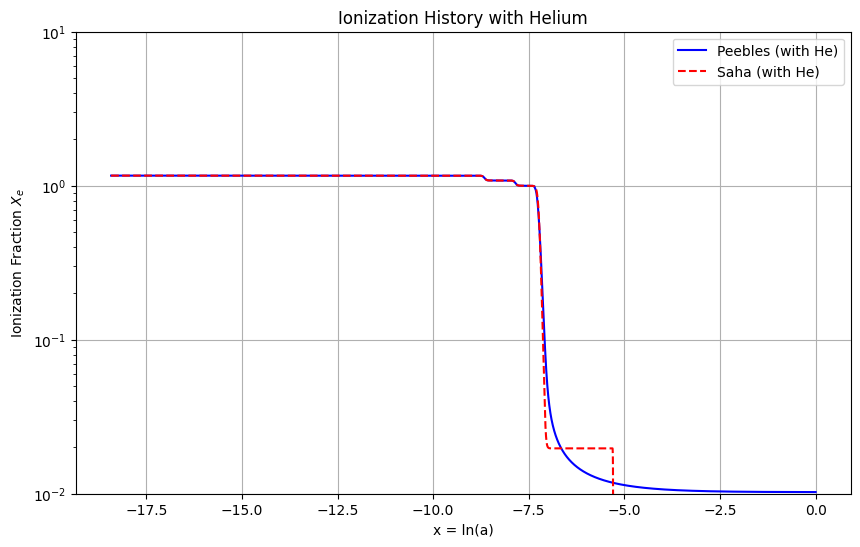

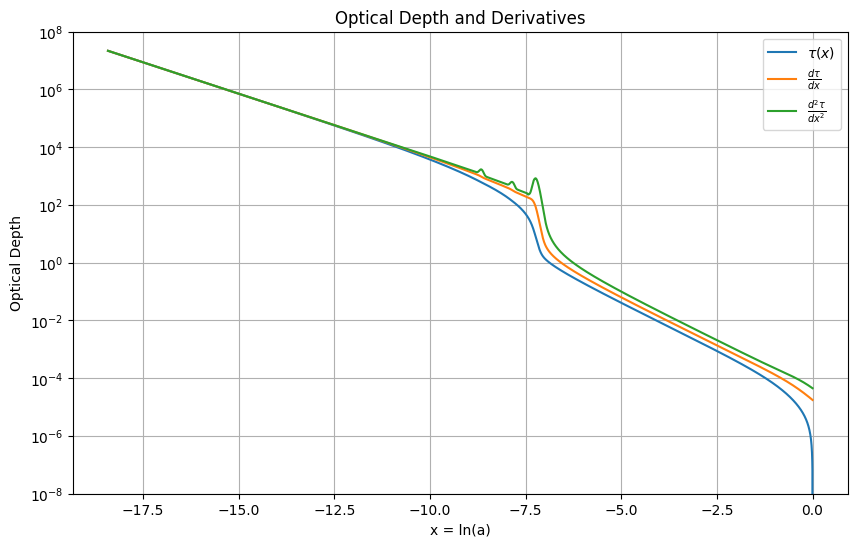

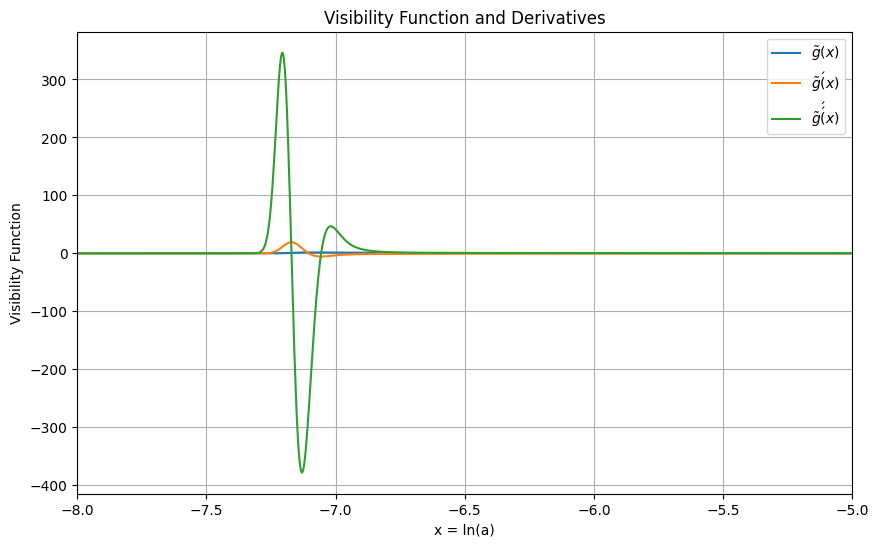

Freeze-out abundance Xe(today) = 1.02e-02


In [ ]:
import numpy as np
from scipy.integrate import cumulative_trapezoid, solve_ivp
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# =================================================================
# Recombination History Class
# =================================================================

class RecombinationHistory:
    def __init__(self, bg):
        self.bg = bg
        # Use background's x-array directly
        self.x = bg.x
        # Compute derived quantities from background
        self.a = np.exp(self.x)
        self.z = 1/self.a - 1
        self.Yp = 0.245937  # Helium mass fraction
        self.x_H = np.zeros_like(self.x)  # Hydrogen ionization fraction
        self.x_He = np.zeros_like(self.x)  # Helium ionization fraction

        # Solve recombination history
        self._solve_Xe()
        self._solve_tau()
        self._solve_visibility()
        self._create_splines()

        # Create n_e spline for stable calculation
        self._create_n_e_spline()

    def _create_n_e_spline(self):
        """Create spline for electron number density with stable calculation"""
        # Precompute log(n_H) to avoid large exponents
        log_n_H = np.log((1 - self.Yp) * self.bg.rho_crit * self.bg.OmegaB / const.m_H * self.a**-3)

        # Create spline for log(n_H)
        self.ln_n_H_spline = CubicSpline(self.x, log_n_H)

        # Create spline for n_e = Xe * exp(log_n_H)
        n_e = self.Xe * np.exp(log_n_H)
        self.n_e_spline = CubicSpline(self.x, n_e)

    def n_e_of_x(self, x):
        """Get electron number density with numerically stable spline"""
        return self.n_e_spline(x)

    def _saha_with_helium(self, T_b, n_b, Yp, tol=1e-10, max_iter=100):
        """
        Compute ionization fractions including helium using iterative Saha solution
        Returns: Xe (n_e/n_H), x_Hp (H ionization fraction), y1 (He+), y2 (He++)
        """
        saha_factor = (const.m_e * const.k_b * T_b / (2 * np.pi * const.hbar**2)) ** 1.5

        # Number densities
        n_H = (1 - Yp) * n_b
        n_He = (Yp / 4) * n_b

        # Initialize electron density fraction
        f_e = np.ones_like(T_b)
        n_e = np.maximum(f_e * n_b, 1e-100)

        for _ in range(max_iter):
            A_H = 2 * saha_factor * np.exp(-const.epsilon_0/(const.k_b*T_b)) / n_e
            x_Hp = A_H / (1 + A_H)

            A_He1 = 2 * saha_factor * np.exp(-const.xhi0/(const.k_b*T_b)) / n_e
            A_He2 = 4 * saha_factor * np.exp(-const.xhi1/(const.k_b*T_b)) / n_e

            y0 = 1.0 / (1 + A_He1 + A_He1 * A_He2)
            y1 = A_He1 * y0
            y2 = A_He2 * y1

            f_e_new = (n_H * x_Hp + n_He * (y1 + 2*y2)) / n_b
            if np.max(np.abs(f_e_new - f_e)) < tol:
                break
            f_e = f_e_new
            n_e = np.maximum(f_e * n_b, 1e-100)

        Xe = f_e * n_b / n_H
        return Xe, x_Hp, y1, y2

    def _peebles_rhs(self, x_H, x):
        # Use background's H function directly
        H = self.bg.H(x)
        # Use precomputed a from background
        a = np.exp(x)
        n_b = self.bg.rho_crit * self.bg.OmegaB / const.m_H * a**-3
        n_H = (1 - self.Yp) * n_b
        n_He = (self.Yp / 4) * n_b
        T_b = self.bg.TCMB / a

        phi = max(0.0, 0.448 * np.log(const.epsilon_0 / (const.k_b * T_b)))
        alpha2 = (8.0 / np.sqrt(3 * np.pi)) * const.sigma_T * \
                 np.sqrt(const.epsilon_0 / (const.k_b * T_b)) * phi * const.c

        beta = alpha2 * (const.m_e * const.k_b * T_b / (2 * np.pi * const.hbar**2))**1.5 * \
               np.exp(-const.epsilon_0 / (const.k_b * T_b))

        Xe_total = x_H + self.x_He_spline(x)
        lambda_alpha = H * (3 * const.epsilon_0)**3 / \
                       (64 * np.pi**2 * (1 - x_H) * n_H * const.hbar**3 * const.c**3)

        Cr = (const.lambda_2s1s + lambda_alpha) / (const.lambda_2s1s + lambda_alpha + beta)

        # dX_H/dx = Cr/H * [beta*(1 - x_H) - n_H*alpha2*x_H^2 * (n_e_total)/n_H]
        n_e_total = x_H * n_H + self.x_He_spline(x) * n_He
        return Cr / H * (beta * (1 - x_H) - alpha2 * x_H**2 * n_e_total)

    def _solve_Xe(self):
        # Use precomputed a from background
        a = self.a
        n_b = self.bg.rho_crit * self.bg.OmegaB / const.m_H * a**-3
        T_b = self.bg.TCMB / a

        Xe_saha, x_H_saha, y1, y2 = self._saha_with_helium(T_b, n_b, self.Yp)

        # Helium recombination
        He_recombined = y2 < 0.99
        if np.any(He_recombined):
            idx_He = np.argmax(He_recombined)
            self.x_He[:idx_He] = y1[:idx_He] + 2*y2[:idx_He]
            self.x_He[idx_He:] = y1[idx_He:] + 2*y2[idx_He:]
        else:
            self.x_He[:] = y1 + 2*y2
        self.x_He_spline = CubicSpline(self.x, self.x_He)
        print(f"Helium recombination at x={self.x[idx_He]:.3f}")

        # Hydrogen recombination via Peebles
        H_trans = x_H_saha < 0.99
        idx_H = np.argmax(H_trans)
        sol = solve_ivp(
            lambda xi, y: [self._peebles_rhs(y[0], xi)],
            [self.x[idx_H], self.x[-1]], [x_H_saha[idx_H]],
            t_eval=self.x[idx_H:], method='Radau', rtol=1e-6, atol=1e-8
        )

        Xe_full = np.zeros_like(self.x)
        Xe_full[:idx_H] = Xe_saha[:idx_H]
        Xe_full[idx_H:] = sol.y[0]

        self.Xe = Xe_full
        self.Xe_saha = Xe_saha
        self.x_H = np.concatenate([x_H_saha[:idx_H], sol.y[0]])

    def _solve_tau(self):
        # Use background's H function directly
        H = self.bg.H(self.x)
        n_H = (1 - self.Yp) * self.bg.rho_crit * self.bg.OmegaB / const.m_H * self.a**-3
        n_e = self.Xe * n_H

        # Compute physical dτ/dx (positive value)
        dtaudx_physical = const.sigma_T * n_e * const.c / H

        # Apply smoothing to reduce numerical noise - Savitzky-Golay filter preserves features
        window_length = min(51, len(self.x))  # Ensure window size is appropriate
        if window_length % 2 == 0:  # Must be odd
            window_length -= 1
        dtaudx_smoothed = savgol_filter(dtaudx_physical, window_length, 3)

        # Create splines with physical derivatives
        self.dtaudx_spline = CubicSpline(self.x, dtaudx_smoothed)
        self.d2taudx2_spline = CubicSpline(self.x, savgol_filter(dtaudx_physical, window_length, 3, deriv=1))

        # Integrate to get τ(x) - use smoothed derivative for stability
        sol = solve_ivp(
            lambda xi, t: -self.dtaudx_spline(xi),
            [0, self.x[0]], [0.0],
            t_eval=self.x[::-1], method='LSODA', rtol=1e-8, atol=1e-8
        )
        self.tau = sol.y[0][::-1]
        self.tau_spline = CubicSpline(self.x, self.tau)

        # Store mathematical derivatives (negative of physical)
        self.actual_dtaudx = -dtaudx_smoothed
        self.actual_dtaudx_spline = CubicSpline(self.x, self.actual_dtaudx)

        # Compute second derivative directly from mathematical first derivative
        self.actual_d2taudx2_spline = self.actual_dtaudx_spline.derivative()

    def _solve_visibility(self):
        """Compute visibility function with proper derivatives"""
        # Use physical dτ/dx directly
        dtaudx_physical = self.dtaudx_spline(self.x)
        self.g = dtaudx_physical * np.exp(-self.tau)

        # Create splines for visibility function and its derivatives
        self.g_spline = CubicSpline(self.x, self.g, bc_type='natural')
        self.dgdx_spline = self.g_spline.derivative()
        self.d2gdx2_spline = self.g_spline.derivative(2)

    def _create_splines(self):
        self.Xe_spline = CubicSpline(self.x, self.Xe)
        self.ln_n_H_spline = CubicSpline(self.x, np.log((1-self.Yp)*self.bg.rho_crit*self.bg.OmegaB/const.m_H*self.a**-3))
        self.tau_spline = CubicSpline(self.x, self.tau)
        self.g_spline = CubicSpline(self.x, self.g)

    def compute_decoupling_times(self):
        def f_tau(xi): return self.tau_spline(xi) - 1.0
        sol_t = root_scalar(f_tau, bracket=[self.x[0], self.x[-1]], method='brentq')
        x_dec = sol_t.root
        z_dec = 1/np.exp(x_dec) - 1
        print(f"Decoupling (τ=1): z={z_dec:.1f}, x={x_dec:.3f}")

        def f_xe(xi): return self.Xe_spline(xi) - 0.1
        sol_x = root_scalar(f_xe, bracket=[self.x[0], self.x[-1]], method='brentq')
        x_rec = sol_x.root
        z_rec = 1/np.exp(x_rec) - 1
        print(f"Recombination (Xe=0.1): z={z_rec:.1f}, x={x_rec:.3f}")

    def plot_Xe_comparison(self):
        """Plot Xe from Saha and Peebles equations"""
        plt.figure(figsize=(10,6))
        plt.semilogy(self.x, self.Xe, 'b-', label='Peebles (with He)')
        plt.semilogy(self.x, self.Xe_saha, 'r--', label='Saha (with He)')
        plt.ylim(10**-2, 10**1)
        plt.xlabel('x = ln(a)')
        plt.ylabel('Ionization Fraction $X_e$')
        plt.legend()
        plt.grid(True)
        plt.title('Ionization History with Helium')
        plt.show()

    def plot_tau_derivatives(self):
        """Plot optical depth derivatives"""
        x = self.x
        tau = self.tau_spline(x)
        # Use mathematically correct derivatives
        actual_dtaudx = self.actual_dtaudx_spline(x)
        actual_d2taudx2 = self.actual_d2taudx2_spline(x)

        plt.figure(figsize=(10,6))
        plt.plot(x, tau, label=r'$\tau(x)$')
        plt.plot(x, -actual_dtaudx, label=r'$\frac{d\tau}{dx}$')
        plt.plot(x, actual_d2taudx2, label=r'$\frac{d^2\tau}{dx^2}$')
        plt.xlabel('x = ln(a)')
        #plt.xlim(-8.33, -8.238)
        plt.ylabel('Optical Depth')
        plt.ylim(10**-8,10**8)
        plt.yscale("log")
        plt.legend()
        plt.grid(True)
        plt.title('Optical Depth and Derivatives')
        plt.show()

    def plot_visibility_derivatives(self):
        """Plot visibility function and derivatives"""
        x = self.x
        g = self.g_spline(x)
        dgdx = self.dgdx_spline(x)
        d2gdx2 = self.d2gdx2_spline(x)

        plt.figure(figsize=(10,6))
        plt.plot(x, g, label=r'$\tilde{g}(x)$')
        plt.plot(x, dgdx, label=r'$\tilde{g}\'(x)$')
        plt.plot(x, d2gdx2, label=r'$\tilde{g}\'\'(x)$')
        plt.xlabel('x = ln(a)')
        plt.ylabel('Visibility Function')
        plt.xlim(-8, -5)  # Focus where visibility peaks
        plt.legend()
        plt.grid(True)
        plt.title('Visibility Function and Derivatives')
        plt.show()

# =================================================================
# Main Program
# =================================================================
if __name__ == "__main__":
    # Initialize cosmology with correct parameters
    bg = BackgroundCosmology()

    try:
        rec = RecombinationHistory(bg)
        rec.compute_decoupling_times()
        rec.plot_Xe_comparison()
        rec.plot_tau_derivatives()
        rec.plot_visibility_derivatives()
        print(f"Freeze-out abundance Xe(today) = {rec.Xe[-1]:.2e}")
    except Exception as e:
        print(f"Error occurred: {str(e)}")

# **Perturbations using CLASS**


In [ ]:
!pip install Cython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.7 MB/s eta 0:00:00


  Using cached classy-3.3.0.0.tar.gz (6.3 MB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'classy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'classy'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for classy: filename=classy-3.3.0.0-cp311-cp311-linux_x86_64.whl size=11874746 sha256=765c01449f7c7126d6676b86c292fdefad9dcfff0e19a837d75652689e276028
  Stored in directory: /root/.cache/pip/wheels/98/b8/29/4fc545f931b5f16fca92543b997f87f87da8ce584f067ea8d7
Successfully built classy


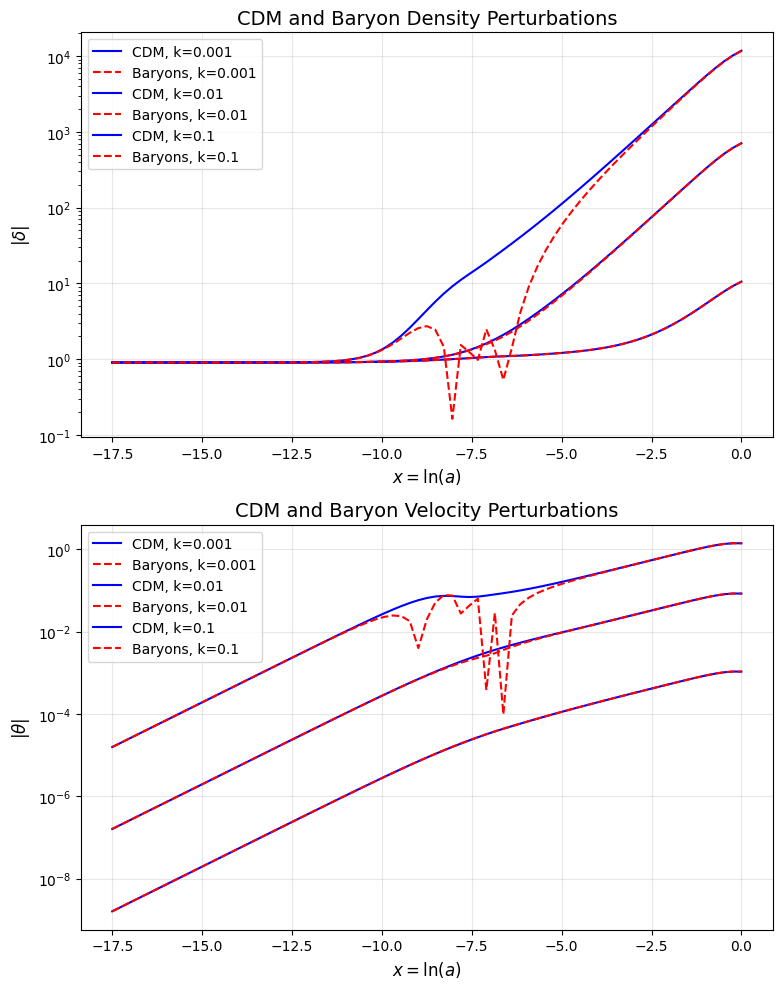

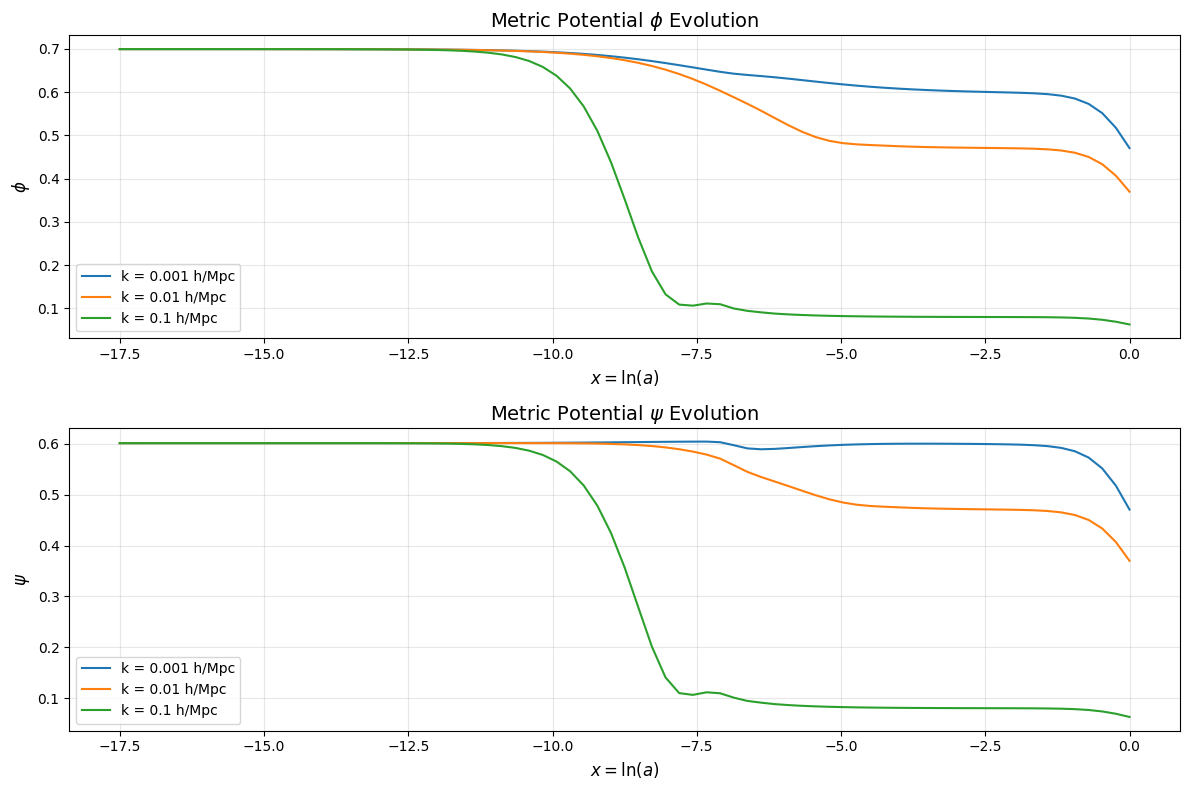

In [ ]:
!pip install classy
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# ==============================================
# PART 1: Transfer Functions Evolution from x = -17.5 to 0
# ==============================================

# Create a logarithmic grid in scale factor a
a_min = np.exp(-17.5)
a_max = 1.0
a = np.logspace(np.log10(a_min), np.log10(a_max), 75)  # 50 points
x_vals = np.log(a)  # x = ln(a)
z_vals = 1/a - 1  # Convert to redshift

# Convert to comma-separated string of redshifts
z_list = [f'{z_val:.6f}' for z_val in z_vals]
z_str = ','.join(z_list)

# k values to analyze (h/Mpc)
k_vals = [0.001, 0.01, 0.1]

# Prepare CLASS parameters
params_evolution = {
    'output': 'dTk,vTk',     # Density and velocity transfer functions
    'gauge': 'newtonian',     # Use Newtonian gauge
    'h': 0.678,               # Hubble parameter
    'omega_b': 0.022,         # Physical baryon density
    'omega_cdm': 0.122,       # Physical CDM density
    'n_s': 0.96,              # Scalar spectral index
    'A_s': 2.1e-9,            # Primordial curvature amplitude
    'tau_reio': 0.06,         # Optical depth at reionization

    # Critical fixes for high redshift:
    'matter_source_in_current_gauge': 'yes',
    'l_max_g': 4,             # Required for photon hierarchy integration

    # k-range settings
    'k_output_values': ','.join(map(str, k_vals)),  # Our fixed k values
    'k_per_decade_for_pk': 100,

    # Explicitly specify the redshifts we want
    'z_pk': z_str,           # Pass our redshift array directly
}

# Initialize CLASS
cosmo = Class()
cosmo.set(params_evolution)
cosmo.compute()

# Arrays to store results
d_cdm = np.zeros((len(z_vals), len(k_vals)))
d_b = np.zeros((len(z_vals), len(k_vals)))
d_g = np.zeros((len(z_vals), len(k_vals)))
d_ur = np.zeros((len(z_vals), len(k_vals)))
t_cdm = np.zeros((len(z_vals), len(k_vals)))
t_b = np.zeros((len(z_vals), len(k_vals)))
t_g = np.zeros((len(z_vals), len(k_vals)))
phi = np.zeros((len(z_vals), len(k_vals)))
psi = np.zeros((len(z_vals), len(k_vals)))

# Retrieve transfer functions at each redshift
for i, z_val in enumerate(z_vals):
    try:
        tf = cosmo.get_transfer(z_val)
        k = tf['k (h/Mpc)']  # Wavenumbers

        # Find indices of our fixed k values
        indices = [np.argmin(np.abs(k - k_val)) for k_val in k_vals]

        # Store values for each k
        for j, idx in enumerate(indices):
            d_cdm[i, j] = tf['d_cdm'][idx]
            d_b[i, j] = tf['d_b'][idx]
            d_g[i, j] = tf['d_g'][idx]
            d_ur[i, j] = tf['d_ur'][idx]
            t_cdm[i, j] = tf['t_cdm'][idx]
            t_b[i, j] = tf['t_b'][idx]
            t_g[i, j] = tf['t_g'][idx]
            phi[i, j] = tf['phi'][idx]
            psi[i, j] = tf['psi'][idx]
    except Exception as e:
        print(f"Error at z={z_val}: {str(e)}")
        # Fill with zeros if transfer functions not available
        for j in range(len(k_vals)):
            d_cdm[i, j] = 0.0
            d_b[i, j] = 0.0
            d_g[i, j] = 0.0
            d_ur[i, j] = 0.0
            t_cdm[i, j] = 0.0
            t_b[i, j] = 0.0
            t_g[i, j] = 0.0
            phi[i, j] = 0.0
            psi[i, j] = 0.0

# Create figure for density perturbations (log scale for better visibility)
plt.figure(figsize=(15, 10))

# CDM and Baryons
plt.subplot(2, 2, 1)
for j, k_val in enumerate(k_vals):
    plt.semilogy(x_vals, np.abs(d_cdm[:, j]), 'b-', label=f'CDM, k={k_val}')
    plt.semilogy(x_vals, np.abs(d_b[:, j]), 'r--', label=f'Baryons, k={k_val}')
plt.xlabel('$x = \ln(a)$', fontsize=12)
plt.ylabel('$|\delta|$', fontsize=12)
plt.title('CDM and Baryon Density Perturbations', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Velocity perturbations
plt.subplot(2, 2, 3)
for j, k_val in enumerate(k_vals):
    plt.semilogy(x_vals, np.abs(t_cdm[:, j]), 'b-', label=f'CDM, k={k_val}')
    plt.semilogy(x_vals, np.abs(t_b[:, j]), 'r--', label=f'Baryons, k={k_val}')
plt.xlabel('$x = \ln(a)$', fontsize=12)
plt.ylabel('$|\\theta|$', fontsize=12)
plt.title('CDM and Baryon Velocity Perturbations', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('density_velocity_evolution_full.pdf', dpi=150)
plt.show()

# Create figure for metric potentials
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for j, k_val in enumerate(k_vals):
    plt.plot(x_vals, phi[:, j], label=f'k = {k_val} h/Mpc')
plt.xlabel('$x = \ln(a)$', fontsize=12)
plt.ylabel('$\phi$', fontsize=12)
plt.title('Metric Potential $\phi$ Evolution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
for j, k_val in enumerate(k_vals):
    plt.plot(x_vals, psi[:, j], label=f'k = {k_val} h/Mpc')
plt.xlabel('$x = \ln(a)$', fontsize=12)
plt.ylabel('$\psi$', fontsize=12)
plt.title('Metric Potential $\psi$ Evolution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('potential_evolution_full.pdf', dpi=150)
plt.show()


# Clean up
cosmo.struct_cleanup()
cosmo.empty()

# **Angular Power Spectrum using CLASS**

/tmp/ipython-input-15-3924779289.py:80: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(dl_exp)*0.1, max(dl_tt)*10)


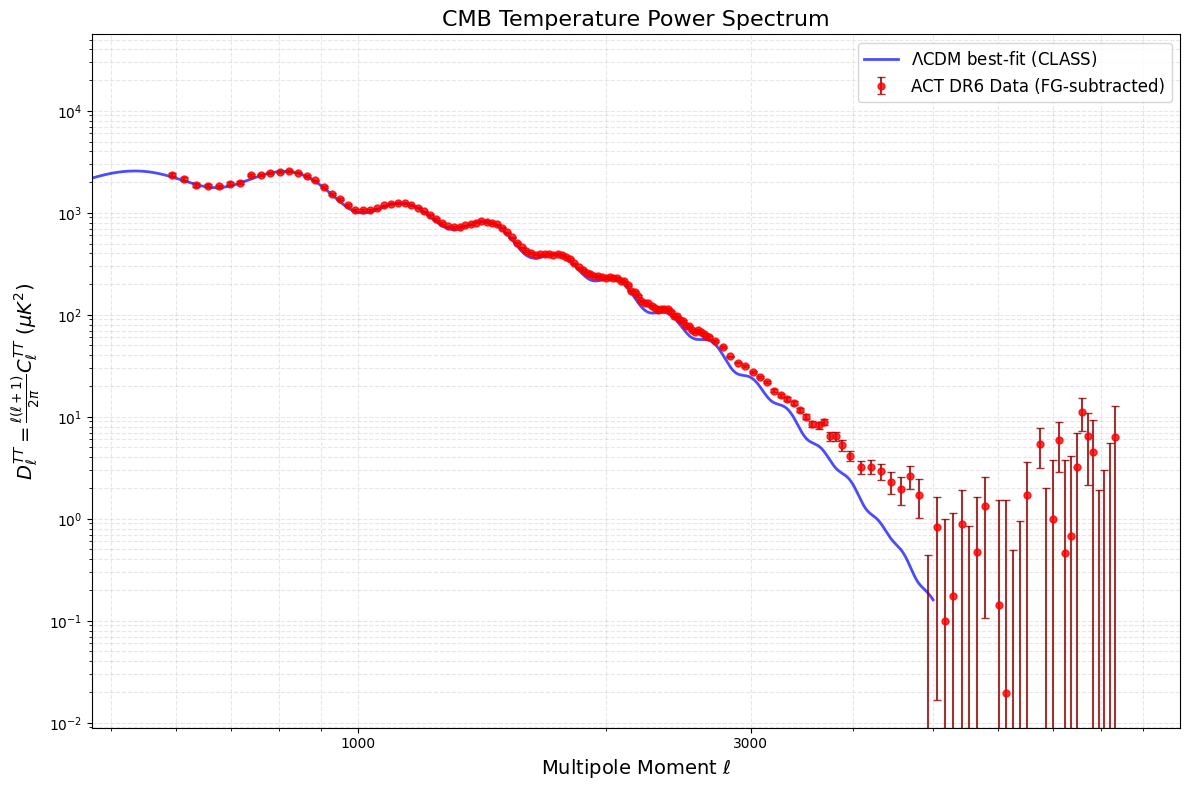

In [ ]:
#!pip install classy #si lo vas a correr necesitas este paquete (se demora resto la instalación xd)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from classy import Class

# ==================================================================
# 1. PARSE EXPERIMENTAL DATA (FOREGROUND-SUBTRACTED)
# ==================================================================
exp_data = np.loadtxt('/content/fg_subtracted_TT.dat', comments='#')
ell_bin = exp_data[:, 0]      # Multipole bin centers
dl_exp = exp_data[:, 1]       # Dℓ = ℓ(ℓ+1)Cℓ/2π (μK²)
dl_err = exp_data[:, 2]       # Error bars

# ==================================================================
# 2. COMPUTE THEORETICAL CMB POWER SPECTRUM WITH CLASS
# ==================================================================
params_cmb = {
    'output': 'tCl, lCl',     # REQUIRED: Include lensing potential (lCl)
    'modes': 's',              # REQUIRED: Scalar modes for lensing
    'lensing': 'yes',          # Include lensing effect
    'l_max_scalars': 5000,     # Maximum multipole
    'h': 0.678,                # Hubble parameter
    'omega_b': 0.022,          # Physical baryon density
    'omega_cdm': 0.122,        # Physical CDM density
    'n_s': 0.96,               # Scalar spectral index
    'A_s': 2.1e-9,             # Primordial curvature amplitude
    'tau_reio': 0.06,          # Optical depth
    'non linear': 'halofit',   # Non-linear correction
}

cosmo_cmb = Class()
cosmo_cmb.set(params_cmb)
cosmo_cmb.compute()

# Get CMB power spectrum
cls = cosmo_cmb.raw_cl(5000)
ll = cls['ell'][2:]  # Skip ℓ=0,1
cl_tt = cls['tt'][2:] * (1e6 * cosmo_cmb.T_cmb())**2  # Convert to μK²
dl_tt = ll * (ll + 1) * cl_tt / (2 * np.pi)  # Dℓ spectrum

# ==================================================================
# 3. PLOT COMPARISON: THEORY vs EXPERIMENTAL DATA
# ==================================================================
plt.figure(figsize=(12, 8))

# Plot theoretical curve
plt.plot(ll, dl_tt, 'b-', alpha=0.7, linewidth=2,
         label=r'$\Lambda$CDM best-fit (CLASS)')

# Plot experimental data with error bars
plt.errorbar(
    ell_bin,
    dl_exp,
    yerr=dl_err,
    fmt='o',
    markersize=5,
    capsize=3,
    color='red',
    ecolor='darkred',
    alpha=0.8,
    label='ACT DR6 Data (FG-subtracted)'
)

# Formatting
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Multipole Moment $\ell$', fontsize=14)
plt.ylabel(r'$D_\ell^{TT} = \frac{\ell(\ell+1)}{2\pi} C_\ell^{TT}$ ($\mu K^2$)', fontsize=14)
plt.title('CMB Temperature Power Spectrum', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.legend(fontsize=12)

# Set custom x-ticks
plt.xticks([30, 100, 300, 1000, 3000],
           ['30', '100', '300', '1000', '3000'])

# Adjust axis limits
plt.xlim(min(ell_bin)*0.8, max(ell_bin)*1.2)
plt.ylim(min(dl_exp)*0.1, max(dl_tt)*10)

plt.tight_layout()
plt.savefig('cmb_power_spectrum_comparison.pdf', dpi=150)
plt.show()

# Clean up
cosmo_cmb.struct_cleanup()
cosmo_cmb.empty()

#Perturbations(It's usseless but don't delete it)

In [ ]:
import numpy as np
from scipy.interpolate import RectBivariateSpline, CubicSpline
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os
import time
import warnings

class Perturbations:
    """Cosmological perturbations solver with improved tight coupling scheme"""

    def __init__(self, bg, const, rec, keta_max=2000.0, npts_k=100, n_ell=8, plot_dir="perturbation_plots"):
        self.bg = bg
        self.const = const
        self.rec = rec
        self.eta0 = bg.eta_spline(0.0)
        self.H0 = bg.H0

        # Physics-based recombination parameters
        self.z_rec = 1194.2
        self.x_rec = np.log(1/(1 + self.z_rec))
        self.tight_coupling_onset_z = 4000
        self.x_onset = np.log(1/(1 + self.tight_coupling_onset_z))

        # Setup integration parameters - k in Mpc⁻¹
        self.x_start = bg.x_start
        self.x_end = 0.0

        # Convert H0 to Mpc⁻¹ units
        H0_inv_mpc = self.const.c / (self.const.Mpc * self.H0)  # H0 in Mpc⁻¹ units
        self.k_min = max(1e-4, 0.5 / H0_inv_mpc)
        self.k_max = 800 / H0_inv_mpc
        self.npts_k = min(npts_k, 50)
        self.n_ell = min(max(n_ell, 3), 12)

        # Tight coupling state vector indices: [δ_c, v_c, δ_b, v_b, Θ0, Θ1]
        self.idx_delta_cdm_tc = 0
        self.idx_v_cdm_tc = 1
        self.idx_delta_b_tc = 2
        self.idx_v_b_tc = 3
        self.idx_Theta0_tc = 4
        self.idx_Theta1_tc = 5
        self.n_tc = 6

        # Full system indices
        self.idx_delta_cdm = 0
        self.idx_v_cdm = 1
        self.idx_delta_b = 2
        self.idx_v_b = 3
        self.idx_Phi = 4
        self.idx_Theta0 = 5
        self.idx_Theta1 = 6
        self.idx_Theta_start = 7
        self.n_full = 7 + (self.n_ell - 2)

        # Solver settings
        self.rtol = 1e-6
        self.atol = 1e-8
        self.max_step = 0.001

        # Output directories
        self.plot_dir = plot_dir
        os.makedirs(plot_dir, exist_ok=True)
        self.debug_dir = "debug_logs"
        os.makedirs(self.debug_dir, exist_ok=True)
        self.residual_dir = "residual_logs"
        os.makedirs(self.residual_dir, exist_ok=True)

        # Precompute splines for derivatives
        Hp_values = bg.Hp_of_x(bg.x)
        self.Hp_spline = CubicSpline(bg.x, Hp_values)
        self.dHpdx_spline = self.Hp_spline.derivative()
        self.d2Hpdx2_spline = self.dHpdx_spline.derivative()

        # Precompute conformal time spline
        eta_x = bg.eta_spline(np.exp(bg.x))
        self.eta_x_spline = CubicSpline(bg.x, eta_x)

        # Precompute recombination derivatives
        self.d2taudx2_spline = self.rec.dtaudx_spline.derivative()

        # Debug counters
        self.tc_fail_count = 0
        self.full_fail_count = 0
        self.residual_warn_count = 0
        self.warn_interval = 100

        print(f"Perturbations initialized: k=[{self.k_min:.2e},{self.k_max:.2e}] 1/Mpc, n_ell={self.n_ell}, n_k={self.npts_k}")
        print(f"Recombination at z={self.z_rec:.1f}, x={self.x_rec:.4f}")
        print(f"Tight coupling onset at z={self.tight_coupling_onset_z}, x={self.x_onset:.4f}")

    def solve(self):
        """Solve perturbations with improved tight coupling scheme"""
        start_time = time.time()
        k_arr = np.geomspace(self.k_min, self.k_max, self.npts_k)  # k in Mpc⁻¹
        x_store = np.linspace(self.x_start, 0.0, 200)

        # Find GLOBAL tight coupling end
        print("Determining global tight coupling end...")
        x_tc_end = self.find_global_tight_coupling_end()
        print(f"Global tight coupling ends at x={x_tc_end:.4f}")

        # Initialize storage
        storage_names = [
            "delta_cdm", "v_cdm", "delta_b", "v_b", "Phi",
            "Theta0", "Theta1", "Theta2", "source_T"
        ]
        for l in range(3, self.n_ell):
            storage_names.append(f"Theta{l}")
        storage = {name: np.zeros((len(k_arr), len(x_store))) for name in storage_names}

        print(f"Solving for {len(k_arr)} k-values...")
        for ik, k in enumerate(k_arr):
            self.k = k  # k in Mpc⁻¹
            print(f"  k = {k:.4f} Mpc⁻¹ ({ik+1}/{len(k_arr)})")

            # Create debug file for this k-mode
            k_debug_file = open(f"{self.debug_dir}/k_{k:.4f}_debug.txt", "w")
            k_debug_file.write(f"Debugging for k = {k:.4f} Mpc⁻¹\n")
            k_debug_file.write("x, delta_cdm, v_cdm, Theta0, Theta1, Phi, dtaudx, Hp, Psi, Residual\n")

            # Create separate residual file
            residual_file = open(f"{self.residual_dir}/residuals_k_{k:.4f}.txt", "w")
            residual_file.write(f"Residuals for k = {k:.4f} Mpc⁻¹\n")
            residual_file.write("x, residual, Phi, density_term, Psi, Theta0, Theta2\n")

            # Adjust tolerances for small k modes
            if k < 0.001:  # Relax tolerances for large-scale modes
                rtol_tc = 1e-4
                atol_tc = 1e-6
            else:
                rtol_tc = self.rtol
                atol_tc = self.atol

            # Initialize solver states
            sol_tc = None
            sol_full = None
            tc_success = False
            full_success = False
            y_tc_end = np.zeros(self.n_tc)

            # Tight coupling regime with improved scheme
            try:
                y0_tc = self.set_initial_conditions_tc(self.x_start)

                # Dynamic step sizing with more conservative approach
                step_range = x_tc_end - self.x_start
                first_step_tc = max(1e-10, min(1e-5, step_range/1000))
                max_step_tc = min(self.max_step, 0.1*abs(step_range))

                sol_tc = solve_ivp(
                    self.rhs_improved_tight_coupling,
                    [self.x_start, x_tc_end],
                    y0_tc,
                    method='Radau',
                    rtol=rtol_tc,
                    atol=atol_tc,
                    dense_output=True,
                    first_step=first_step_tc,
                    max_step=max_step_tc
                )
                if not sol_tc.success:
                    raise RuntimeError(f"Tight coupling solver failed: {sol_tc.message}")
                y_tc_end = sol_tc.y[:, -1]
                tc_success = True

                # Physics validation check
                if np.any(np.isnan(y_tc_end)) or np.any(np.isinf(y_tc_end)):
                    raise RuntimeError("Tight coupling solution contains NaNs or Infs")

                # Log tight coupling end state
                k_debug_file.write("Tight coupling end state:\n")
                k_debug_file.write(f"  δ_cdm={y_tc_end[self.idx_delta_cdm_tc]:.4e}, v_b={y_tc_end[self.idx_v_b_tc]:.4e}\n")
                k_debug_file.write(f"  Θ0={y_tc_end[self.idx_Theta0_tc]:.4e}, Θ1={y_tc_end[self.idx_Theta1_tc]:.4e}\n\n")

            except Exception as e:
                self.tc_fail_count += 1
                print(f"Tight coupling failed for k={k:.4f}: {str(e)}")
                y_tc_end = np.zeros(self.n_tc)
                x_tc_end = self.x_start

            # Full system regime
            try:
                y0_full = self.set_initial_conditions_full(x_tc_end, y_tc_end, k_debug_file)

                # Check for NaNs in initial conditions
                if np.any(np.isnan(y0_full)) or np.any(np.isinf(y0_full)):
                    raise RuntimeError("Full system initial condition contains NaNs or Infs")

                # Log initial state for full system
                k_debug_file.write("Full system initial state:\n")
                k_debug_file.write(f"  δ_cdm={y0_full[self.idx_delta_cdm]:.4e}, v_b={y0_full[self.idx_v_b]:.4e}\n")
                k_debug_file.write(f"  Θ0={y0_full[self.idx_Theta0]:.4e}, Θ1={y0_full[self.idx_Theta1]:.4e}\n")
                k_debug_file.write(f"  Θ2={y0_full[self.idx_Theta_start]:.4e}\n")
                if self.n_ell > 3:
                    k_debug_file.write(f"  Θ3={y0_full[self.idx_Theta_start+1]:.4e}\n")
                k_debug_file.write(f"  Φ={y0_full[self.idx_Phi]:.4e}\n\n")

                # Ensure time span is strictly increasing
                x_end_full = max(x_tc_end + 1e-5, self.x_end)

                # Adaptive step size near recombination
                if -7.5 < x_tc_end < -6.5:
                    max_step = 0.0001
                else:
                    max_step = self.max_step

                sol_full = solve_ivp(
                    self.rhs_full,
                    [x_tc_end, x_end_full],
                    y0_full,
                    method='Radau',
                    rtol=self.rtol,
                    atol=self.atol,
                    dense_output=True,
                    first_step=1e-4,
                    max_step=max_step,
                    args=(k_debug_file,)
                )
                if not sol_full.success:
                    raise RuntimeError(f"Full system solver failed: {sol_full.message}")
                full_success = True

                # Physics validation
                if np.any(np.isnan(sol_full.y[:, -1])) or np.any(np.isinf(sol_full.y[:, -1])):
                    raise RuntimeError("Full system solution contains NaNs or Infs")

            except Exception as e:
                self.full_fail_count += 1
                print(f"Full system failed for k={k:.4f}: {str(e)}")
                sol_full = None

            # Evaluate at storage points
            for i, x in enumerate(x_store):
                try:
                    # Handle case where we have a valid tight coupling solution
                    if tc_success and x <= x_tc_end:
                        y_tc = sol_tc.sol(x)
                        # Convert TC state to full system for storage
                        y = np.zeros(self.n_full)

                        # Transfer TC variables
                        y[self.idx_delta_cdm] = y_tc[self.idx_delta_cdm_tc]
                        y[self.idx_v_cdm] = y_tc[self.idx_v_cdm_tc]
                        y[self.idx_delta_b] = y_tc[self.idx_delta_b_tc]
                        y[self.idx_v_b] = y_tc[self.idx_v_b_tc]
                        y[self.idx_Theta0] = y_tc[self.idx_Theta0_tc]
                        y[self.idx_Theta1] = y_tc[self.idx_Theta1_tc]

                        # Compute Φ from Poisson equation
                        a = np.exp(x)
                        k_physical = self.k / self.const.Mpc  # Convert to 1/m
                        k2 = (self.const.c * k_physical)**2
                        rho_cdm = self.bg.rho_cdm(a)
                        rho_b = self.bg.rho_b(a)
                        rho_gamma = self.bg.rho_gamma(a)
                        rho_total = (
                            rho_cdm * y[self.idx_delta_cdm] +
                            rho_b * y[self.idx_delta_b] +
                            4 * rho_gamma * y[self.idx_Theta0]
                        )
                        if k2 < 1e-100:
                            y[self.idx_Phi] = 0.0
                        else:
                            y[self.idx_Phi] = (4 * np.pi * self.const.G * a**2 / k2) * rho_total

                        # Set higher multipoles to 0 for TC storage
                        for l in range(2, self.n_ell):
                            idx = self.idx_Theta_start + (l-2)
                            if idx < len(y):
                                y[idx] = 0.0

                    # Handle case where we have a valid full system solution
                    elif full_success and x >= x_tc_end:
                        y = sol_full.sol(x)

                    # Fallback to zeros if no solution available
                    else:
                        y = np.zeros(self.n_full)
                        y[self.idx_Phi] = 1.0  # Set to 1 to avoid division by zero issues

                    # Store variables
                    storage["delta_cdm"][ik, i] = y[self.idx_delta_cdm]
                    storage["v_cdm"][ik, i] = y[self.idx_v_cdm]
                    storage["delta_b"][ik, i] = y[self.idx_delta_b]
                    storage["v_b"][ik, i] = y[self.idx_v_b]
                    storage["Phi"][ik, i] = y[self.idx_Phi]
                    storage["Theta0"][ik, i] = y[self.idx_Theta0]
                    storage["Theta1"][ik, i] = y[self.idx_Theta1]

                    # Higher multipoles
                    for l in range(2, self.n_ell):
                        idx = self.idx_Theta_start + (l-2)
                        if idx < len(y):
                            storage[f"Theta{l}"][ik, i] = y[idx]

                    # Einstein equation residual check
                    k_physical = self.k / self.const.Mpc  # Convert to 1/m
                    k2 = (self.const.c * k_physical)**2
                    a = np.exp(x)
                    Hp = self.bg.Hp_of_x(x)
                    H0_2 = self.bg.H0**2

                    # Total density perturbation
                    delta_rho = (
                        self.bg.OmegaCDM/a**3 * y[self.idx_delta_cdm] +
                        self.bg.OmegaB/a**3 * y[self.idx_delta_b] +
                        4 * self.bg.OmegaR/a**4 * y[self.idx_Theta0]
                    )

                    # Left side of Poisson equation
                    left_side = k2 * y[self.idx_Phi]

                    # Right side of Poisson equation
                    density_term = (3/2) * H0_2 * a**2 * delta_rho

                    residual = left_side - density_term

                    # Calculate Ψ for logging
                    k2a2 = k2 * a**2
                    Theta2 = storage['Theta2'][ik, i] if 'Theta2' in storage else 0.0
                    if k2a2 > 1e-30:
                        Psi_val = -y[self.idx_Phi] - (12 * H0_2 * self.bg.OmegaR * Theta2) / k2a2
                    else:
                        Psi_val = -y[self.idx_Phi]

                    # Write to main debug file
                    dtaudx = self.rec.dtaudx_spline(x)
                    k_debug_file.write(f"{x:.6f}, {y[self.idx_delta_cdm]:.6e}, {y[self.idx_v_cdm]:.6e}, ")
                    k_debug_file.write(f"{y[self.idx_Theta0]:.6e}, {y[self.idx_Theta1]:.6e}, {y[self.idx_Phi]:.6e}, ")
                    k_debug_file.write(f"{dtaudx:.6e}, {Hp:.6e}, {Psi_val:.6e}, {residual:.6e}\n")

                    # Write to lightweight residual file
                    residual_file.write(f"{x:.6f}, {residual:.6e}, {y[self.idx_Phi]:.6e}, ")
                    residual_file.write(f"{density_term:.6e}, {Psi_val:.6e}, ")
                    residual_file.write(f"{y[self.idx_Theta0]:.6e}, {Theta2:.6e}\n")

                    # Physics-based warning system
                    if abs(residual) > 1e10 or np.isnan(residual):
                        self.residual_warn_count += 1
                        if self.residual_warn_count % self.warn_interval == 0:
                            warnings.warn(f"Large residual: {residual:.2e} at x={x:.3f} for k={k:.4f}")

                except Exception as e:
                    print(f"Storage failed at x={x}, k={k}: {str(e)}")
                    k_debug_file.write(f"{x:.6f}, ERROR, ERROR, ERROR, ERROR, ERROR, ERROR, ERROR, ERROR, ERROR\n")
                    residual_file.write(f"{x:.6f}, ERROR, ERROR, ERROR, ERROR, ERROR, ERROR\n")
                    for name in storage_names:
                        if name != "source_T":
                            storage[name][ik, i] = 0.0

            # Calculate source function for this k
            try:
                self.calculate_source_function(k, x_store, storage, ik)
            except Exception as e:
                print(f"Source function failed for k={k:.4f}: {str(e)}")
                storage["source_T"][ik, :] = 0.0

            # Close files for this k-mode
            k_debug_file.close()
            residual_file.close()

            # Save perturbations for analysis
            np.savetxt(f"perturbations_k{k:.4f}.txt",
                       np.column_stack((x_store,
                                       storage["delta_cdm"][ik],
                                       storage["v_b"][ik],
                                       storage["Phi"][ik])),
                       header="x delta_cdm v_b Phi")

        # Build splines for later use
        self.splines = {}
        for name in storage_names:
            self.splines[name] = RectBivariateSpline(k_arr, x_store, storage[name])

        # Physics summary
        print(f"Tight coupling failures: {self.tc_fail_count}/{len(k_arr)}")
        print(f"Full system failures: {self.full_fail_count}/{len(k_arr)}")
        print(f"Solved perturbations in {time.time()-start_time:.1f} seconds")

        self.x_store = x_store
        self.k_arr = k_arr

    def find_global_tight_coupling_end(self):
        """Determine global tight coupling end with improved criterion"""
        # Extend evaluation range through recombination era
        x_test = np.linspace(self.x_start, self.x_rec + 1.0, 1000)

        # Precompute parameters
        a_test = np.exp(x_test)
        Hp_test = self.Hp_spline(x_test)
        dtaudx_test = np.abs(self.rec.dtaudx_spline(x_test))
        scattering_rate = dtaudx_test * Hp_test  # |dτ/dη|

        # Compute sound speed c_s
        R_test = (3 * self.bg.OmegaB) / (4 * self.bg.OmegaR) * a_test
        c_s_test = 1 / np.sqrt(3 * (1 + R_test))

        # Convert k_max to physical units (1/m) for oscillation frequency calculation
        k_max_physical = self.k_max / self.const.Mpc

        # Compute threshold = 10 × max(aH, k_max·c_s)
        expansion_rate = Hp_test  # aH in conformal time (1/s)
        oscillation_freq = k_max_physical * c_s_test * self.const.c  # Convert to 1/s

        threshold = 10 * np.maximum(expansion_rate, oscillation_freq)

        # Find transition point (first point where scattering_rate < threshold)
        switch_indices = np.where(scattering_rate < threshold)[0]
        if switch_indices.size > 0:
            idx = switch_indices[0]
            x_tc_end = x_test[idx]

            # Debug output
            print(f"Global tight coupling transition at x={x_tc_end:.4f}")
            print(f"  Scattering rate: {scattering_rate[idx]:.2e}")
            print(f"  Threshold: {threshold[idx]:.2e}")
            print(f"  Expansion rate: {expansion_rate[idx]:.2e}")
            print(f"  Oscillation freq: {oscillation_freq[idx]:.2e}")
            print(f"  Sound speed: {c_s_test[idx]:.4f}")

            # Safety check: if transition is too early, use recombination
            if x_tc_end < -10.0:
                print("Warning: Tight coupling transition too early, using recombination")
                x_tc_end = self.x_rec
        else:
            x_tc_end = self.x_rec
            warnings.warn("No valid tight coupling transition found, using recombination")

        return x_tc_end

    def set_initial_conditions_tc(self, x):
        """Physically consistent initial conditions (adiabatic)"""
        y = np.zeros(self.n_tc)
        Hp = self.bg.Hp_of_x(x)
        # Convert k to physical units for calculations
        ck_Hp = (self.const.c * self.k / self.const.Mpc) / Hp  # Dimensionless

        # Handle small k modes (superhorizon)
        if abs(ck_Hp) < 1e-10:
            ck_Hp = 1e-10

        # Adiabatic initial conditions
        Psi = -2/3
        Phi = -Psi

        y[self.idx_delta_cdm_tc] = -1.5 * Psi
        y[self.idx_delta_b_tc] = -1.5 * Psi
        y[self.idx_Theta0_tc] = -0.5 * Psi
        y[self.idx_v_cdm_tc] = -0.5 * ck_Hp * Psi
        y[self.idx_v_b_tc] = -0.5 * ck_Hp * Psi
        y[self.idx_Theta1_tc] = ck_Hp/6 * Psi

        return y

    def rhs_improved_tight_coupling(self, x, y):
        """Improved tight coupling RHS with slip variable"""
        # Background quantities
        Hp = self.bg.Hp_of_x(x)
        dHpdx = self.dHpdx_spline(x)
        d2Hpdx2 = self.d2Hpdx2_spline(x)
        H0 = self.bg.H0
        a = np.exp(x)
        # Speed of light in m/s
        c = self.const.c
        k = self.k / self.const.Mpc  # Convert to 1/m
        ck = c * k  # in s⁻¹
        ckH = ck / Hp  # Dimensionless

        # Recombination parameters
        dtaudx = self.rec.dtaudx_spline(x)
        d2taudx2 = self.d2taudx2_spline(x)
        rho_gamma = self.bg.rho_gamma(a)
        rho_b = self.bg.rho_b(a)
        R = (4.0/3.0) * rho_gamma / rho_b

        # Unpack variables
        v_cdm = y[self.idx_v_cdm_tc]
        v_b = y[self.idx_v_b_tc]
        Theta0 = y[self.idx_Theta0_tc]
        Theta1 = y[self.idx_Theta1_tc]
        delta_cdm = y[self.idx_delta_cdm_tc]
        delta_b = y[self.idx_delta_b_tc]

        # ======================================================================
        # 1. Compute Φ and Ψ
        # ======================================================================
        k2 = (c * k)**2  # s⁻²
        a2 = a**2
        rho_cdm = self.bg.rho_cdm(a)
        rho_b = self.bg.rho_b(a)
        rho_total = (
            rho_cdm * delta_cdm +
            rho_b * delta_b +
            4 * rho_gamma * Theta0
        )
        if k2 < 1e-100:
            Phi = 0.0
        else:
            Phi = (4 * np.pi * self.const.G * a2 / k2) * rho_total
        Psi = -Phi

        # ======================================================================
        # 2. Compute dΦ/dx using momentum constraint
        # ======================================================================
        photon_term = 4 * rho_gamma * c * Theta1
        momentum_sum = (
            rho_cdm * v_cdm +
            rho_b * v_b +
            photon_term
        )
        dPhi_dx = -Psi + (4 * np.pi * self.const.G * a2 / (Hp * k)) * momentum_sum

        # ======================================================================
        # 3. Compute Θ₂ using standard approximation
        # ======================================================================
        if abs(dtaudx) > 1e-10:
            Theta2 = - (8 * ck) / (15 * dtaudx * Hp) * Theta1
        else:
            Theta2 = 0.0

        # ======================================================================
        # 4. Compute Θ₀' from continuity equation
        # ======================================================================
        dTheta0_dx = -ckH * Theta1 - dPhi_dx

        # ======================================================================
        # 5. Compute slip derivative q (Eq. 1)
        # ======================================================================
        # Precompute frequently used terms
        Hp_ratio = dHpdx / Hp
        Sb = 3 * Theta1 + v_b

        # Numerator terms
        term1 = -((1 - R)*dtaudx + (1 + R)*d2taudx2) * Sb
        term2 = -ckH * Psi
        term3 = (1 - Hp_ratio) * ckH * (-Theta0 + 2*Theta2)
        term4 = -ckH * dTheta0_dx

        numerator = term1 + term2 + term3 + term4

        # Regularized denominator (Eq. 1)
        denominator = (1 + R)*dtaudx + Hp_ratio - 1

        # Avoid division by zero
        if abs(denominator) < 1e-10:
            q = 0.0
        else:
            q = numerator / denominator

        # ======================================================================
        # 6. Compute v_b' (Eq. 2) and Θ₁' (Eq. 3)
        # ======================================================================
        # Baryon velocity derivative (Eq. 2)
        v_b_prime = (1/(1 + R)) * (
            -v_b - ckH * Psi +
            R * (q + ckH * (-Theta0 + 2*Theta2) - ckH * Psi)
        )

        # Photon dipole derivative (Eq. 3)
        Theta1_prime = (1/3) * (q - v_b_prime)

        # ======================================================================
        # 7. CDM and baryon density evolution
        # ======================================================================
        ddelta_cdm_dx = -ckH * v_cdm - 3 * dPhi_dx
        ddelta_b_dx = -ckH * v_b - 3 * dPhi_dx
        dv_cdm_dx = -v_cdm + ckH * Psi

        # Derivatives vector
        dydx = np.zeros_like(y)
        dydx[self.idx_delta_cdm_tc] = ddelta_cdm_dx
        dydx[self.idx_v_cdm_tc] = dv_cdm_dx
        dydx[self.idx_delta_b_tc] = ddelta_b_dx
        dydx[self.idx_v_b_tc] = v_b_prime
        dydx[self.idx_Theta0_tc] = dTheta0_dx
        dydx[self.idx_Theta1_tc] = Theta1_prime

        return dydx

    def set_initial_conditions_full(self, x, y_tc_end, debug_file):
        """Full system initialization after TC ends"""
        y_full = np.zeros(self.n_full)

        # Transfer TC variables to full system
        y_full[self.idx_delta_cdm] = y_tc_end[self.idx_delta_cdm_tc]
        y_full[self.idx_v_cdm] = y_tc_end[self.idx_v_cdm_tc]
        y_full[self.idx_delta_b] = y_tc_end[self.idx_delta_b_tc]
        y_full[self.idx_v_b] = y_tc_end[self.idx_v_b_tc]
        y_full[self.idx_Theta0] = y_tc_end[self.idx_Theta0_tc]
        y_full[self.idx_Theta1] = y_tc_end[self.idx_Theta1_tc]

        # Compute Φ at transition point using Poisson equation
        a = np.exp(x)
        k_physical = self.k / self.const.Mpc  # Convert to 1/m
        k2 = (self.const.c * k_physical)**2  # s⁻²
        rho_cdm = self.bg.rho_cdm(a)
        rho_b = self.bg.rho_b(a)
        rho_gamma = self.bg.rho_gamma(a)
        rho_total = (
            rho_cdm * y_full[self.idx_delta_cdm] +
            rho_b * y_full[self.idx_delta_b] +
            4 * rho_gamma * y_full[self.idx_Theta0]
        )
        if k2 < 1e-100:
            y_full[self.idx_Phi] = 0.0
        else:
            y_full[self.idx_Phi] = (4 * np.pi * self.const.G * a**2 / k2) * rho_total

        # Initialize higher multipoles (l ≥ 2) as before
        if self.n_ell > 2:
            dtaudx_val = self.rec.dtaudx_spline(x)
            Theta1 = y_tc_end[self.idx_Theta1_tc]
            Hp = self.bg.Hp_of_x(x)
            ck = self.const.c * k_physical  # s⁻¹

            debug_file.write(f"Full system init at x={x:.6f}\n")
            debug_file.write(f"  dtaudx = {dtaudx_val:.6e}, Hp = {Hp:.6e}\n")
            debug_file.write(f"  Theta1 = {Theta1:.3e}, k = {self.k:.6f}\n")

            # More robust Theta2 initialization
            if abs(dtaudx_val) > 1e-10:
                Theta2 = - (8 * ck) / (15 * dtaudx_val * Hp) * Theta1
            else:
                Theta2 = 0.0  # Avoid division by near-zero

            debug_file.write(f"  Theta2 = {Theta2:.3e}\n")
            y_full[self.idx_Theta_start] = Theta2

            # Initialize higher multipoles (l ≥ 3) with physical relation
            prev_Theta = Theta2
            for l in range(3, self.n_ell):
                idx = self.idx_Theta_start + (l-2)

                if abs(dtaudx_val) > 1e-10:
                    Theta_l = - (l / (2*l + 1)) * (ck / (Hp * dtaudx_val)) * prev_Theta
                else:
                    Theta_l = 0.0

                y_full[idx] = Theta_l
                debug_file.write(f"  Theta{l} = {Theta_l:.3e}\n")
                prev_Theta = Theta_l

        debug_file.write(f"Full initial state: {y_full}\n")
        return y_full

    def rhs_full(self, x, y, debug_file):
        """Full system RHS with corrected physics for photon multipoles"""
        # Adaptive step control near recombination
        if -7.5 < x < -6.5:
            max_step = 0.0001
        else:
            max_step = self.max_step

        # Get recombination derivative
        dtaudx = self.rec.dtaudx_spline(x)

        # Background quantities
        Hp = self.bg.Hp_of_x(x)
        dHpdx = self.dHpdx_spline(x)
        H0 = self.bg.H0
        n_e = self.rec.n_e_of_x(x)
        a = np.exp(x)
        sigma_T = self.const.sigma_T
        R_val = (4.0/3.0) * self.bg.OmegaR / (self.bg.OmegaB * a)
        # Speed of light in m/s
        c = self.const.c
        k = self.k / self.const.Mpc  # Convert to 1/m
        k_over_Hp = (k * c) / Hp  # Dimensionless

        # Unpack variables
        v_cdm = y[self.idx_v_cdm]
        v_b = y[self.idx_v_b]
        Phi = y[self.idx_Phi]
        Theta0 = y[self.idx_Theta0]
        Theta1 = y[self.idx_Theta1]
        delta_cdm = y[self.idx_delta_cdm]
        delta_b = y[self.idx_delta_b]

        # Extract photon multipoles
        Theta = []
        for l in range(2, self.n_ell):
            idx = self.idx_Theta_start + (l-2)
            Theta.append(y[idx] if idx < len(y) else 0.0)
        Theta2 = Theta[0] if len(Theta) > 0 else 0.0

        # Compute Psi from Poisson equation (Equation III)
        k2 = (c * k)**2  # s⁻²
        k2a2 = k2 * a**2
        Psi = -Phi
        if k2a2 > 1e-30:
            Psi -= (12 * H0**2 * self.bg.OmegaR * Theta2) / k2a2

        # Compute dΦ/dx using Einstein equation (Equation III)
        k2_term = (k_over_Hp**2 / 3) * Phi
        # CORRECTED DENSITY TERM SCALING
        density_term = (H0**2 / (2 * Hp**2)) * (
            self.bg.OmegaCDM * np.exp(-3*x) * delta_cdm +  # Ω_cdm0 a^{-3}
            self.bg.OmegaB * np.exp(-3*x) * delta_b +      # Ω_b0 a^{-3}
            4 * self.bg.OmegaR * np.exp(-4*x) * Theta0     # 4Ω_r0 a^{-4}
        )
        dPhi_dx = Psi - k2_term + density_term

        # Photon evolution (Equation I)
        dTheta0_dx = -k_over_Hp * Theta1 - dPhi_dx
        dTheta1_dx = (k_over_Hp / 3) * (Theta0 - 2*Theta2 + Psi) + dtaudx * (Theta1 + v_b/3)

        # CDM and baryon evolution (Equation II)
        d_delta_cdm_dx = k_over_Hp * v_cdm - 3*dPhi_dx
        d_delta_b_dx = k_over_Hp * v_b - 3*dPhi_dx
        d_v_cdm_dx = -v_cdm - k_over_Hp * Psi

        # Corrected baryon velocity equation
        coefficient = - (4 * c * sigma_T * n_e) / (3 * Hp * self.bg.OmegaB)
        velocity_term = coefficient * (3*Theta1 + v_b)
        d_v_b_dx = -v_b - k_over_Hp * Psi + velocity_term

        # Higher multipoles with corrected physics
        dTheta_higher = []
        eta = self.eta_x_spline(x)  # Conformal time

        for l_idx, l in enumerate(range(2, self.n_ell)):
            # Standard recursion for intermediate multipoles
            if l < self.n_ell - 1:
                term = k_over_Hp / (2*l+1) * (l * Theta[l_idx-1] - (l+1) * Theta[l_idx+1])
            # Physical closure for highest multipole
            else:
                # Use stable closure condition with conformal time
                if abs(eta) > 1e-30:
                    term = k_over_Hp * (l/(2*l+1)) * Theta[l_idx-1] - (l+1)/(eta * Hp) * Theta[l_idx]
                else:
                    term = k_over_Hp * (l/(2*l+1)) * Theta[l_idx-1]
                if x < -7:  # Only log during relevant period
                    debug_file.write(f"Stable closure: k_η={k_over_Hp * x:.2e} at x={x:.4f}, eta={eta:.2e}\n")

            # Collision term (without polarization)
            if l == 2:
                coll_term = dtaudx * (-9/10 * Theta[l_idx])  # Corrected for l=2
            else:
                coll_term = dtaudx * (-Theta[l_idx])

            dTheta_dx = term + coll_term
            dTheta_higher.append(dTheta_dx)

        # Construct derivatives vector
        dydx = np.zeros_like(y)
        dydx[self.idx_Phi] = dPhi_dx
        dydx[self.idx_delta_cdm] = d_delta_cdm_dx
        dydx[self.idx_v_cdm] = d_v_cdm_dx
        dydx[self.idx_delta_b] = d_delta_b_dx
        dydx[self.idx_v_b] = d_v_b_dx
        dydx[self.idx_Theta0] = dTheta0_dx
        dydx[self.idx_Theta1] = dTheta1_dx

        # Higher multipoles
        for l_idx in range(2, self.n_ell):
            idx = self.idx_Theta_start + (l_idx - 2)
            if idx < len(dydx) and (l_idx - 2) < len(dTheta_higher):
                dydx[idx] = dTheta_higher[l_idx - 2]

        # Physics validation - check for NaNs/Infs
        if np.any(np.isnan(dydx)) or np.any(np.isinf(dydx)):
            debug_file.write("NaN/Inf detected in derivatives!\n")
            debug_file.write(f"State: {y}\n")
            debug_file.write(f"dydx: {dydx}\n")
            raise RuntimeError("NaN/Inf in derivatives")

        return dydx

    def calculate_source_function(self, k, x_arr, storage, ik):
        """Source function calculation for CMB"""
        # Get recombination functions
        g = self.rec.g_spline(x_arr)
        tau = self.rec.tau_spline(x_arr)
        Hp = self.bg.Hp_spline(x_arr)
        a = np.exp(x_arr)
        c = self.const.c
        k_physical = k / self.const.Mpc  # Convert to 1/m

        # Get perturbations
        Theta0 = storage["Theta0"][ik, :]
        Theta2 = storage["Theta2"][ik, :]
        Phi = storage["Phi"][ik, :]
        vb = storage["v_b"][ik, :]

        # Compute Psi
        k2 = (c * k_physical)**2
        k2a2 = k2 * a**2
        with np.errstate(divide='ignore', invalid='ignore'):
            Psi = -Phi - (12 * self.bg.H0**2 * self.bg.OmegaR * Theta2) / np.where(k2a2>0, k2a2, np.inf)
        Psi[k2a2<=0] = -Phi[k2a2<=0]

        # Create splines for derivatives
        Phi_spline = CubicSpline(x_arr, Phi)
        dPhi_dx = Phi_spline.derivative()(x_arr)
        dPhi_deta = dPhi_dx * (Hp * a)  # d/dη = (Hp a) d/dx

        Psi_spline = CubicSpline(x_arr, Psi)
        dPsi_dx = Psi_spline.derivative()(x_arr)
        dPsi_deta = dPsi_dx * (Hp * a)

        # Compute F = g * vb and its derivative
        F = g * vb
        F_spline = CubicSpline(x_arr, F)
        dF_dx = F_spline.derivative()(x_arr)
        dF_deta = dF_dx * (Hp * a)

        # Source terms
        SW = g * (Theta0 + Psi)
        ISW = np.exp(-tau) * (dPsi_deta - dPhi_deta)
        Doppler = (1.0/k_physical) * dF_deta  # k in SI units (m^{-1})

        # Total source
        source_T = SW + ISW + Doppler
        storage["source_T"][ik, :] = source_T

    def _plot_density_comparison(self, k_vals_mpc, x_vals):
        plt.figure(figsize=(10, 8))
        for k_mpc in k_vals_mpc:
            k_val = k_mpc
            label = f'k = {k_mpc:.3f} Mpc$^{{-1}}$'

            delta_cdm = self.splines["delta_cdm"](k_val, x_vals)[0]
            plt.plot(x_vals, delta_cdm, label=f'$\\delta_{{CDM}}$ ' + label)

            delta_b = self.splines["delta_b"](k_val, x_vals)[0]
            plt.plot(x_vals, delta_b, '--', label=f'$\\delta_b$ ' + label)

        plt.xlabel('x = ln(a)')
        plt.ylabel('Density Perturbations')
        plt.yscale('log')
        plt.title('Density Perturbations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{self.plot_dir}/density_comparison.png", dpi=150)
        plt.close()

    def _plot_velocity_comparison(self, k_vals_mpc, x_vals):
        plt.figure(figsize=(10, 8))
        for k_mpc in k_vals_mpc:
            k_val = k_mpc
            label = f'k = {k_mpc:.3f} Mpc$^{{-1}}$'

            v_cdm = self.splines["v_cdm"](k_val, x_vals)[0]
            plt.plot(x_vals, v_cdm, label=f'$v_{{CDM}}$ ' + label)

            v_b = self.splines["v_b"](k_val, x_vals)[0]
            plt.plot(x_vals, v_b, '--', label=f'$v_b$ ' + label)

        plt.xlabel('x = ln(a)')
        plt.yscale('log')
        plt.ylabel('Velocity Perturbations')
        plt.title('Velocity Perturbations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{self.plot_dir}/velocity_comparison.png", dpi=150)
        plt.close()

    def _plot_photon_multipoles(self, k_vals_mpc, x_vals):
        plt.figure(figsize=(10, 8))
        for k_mpc in k_vals_mpc:
            k_val = k_mpc
            label = f'k = {k_mpc:.3f} Mpc$^{{-1}}$'

            theta0 = self.splines["Theta0"](k_val, x_vals)[0]
            plt.plot(x_vals, theta0, label=f'$\\Theta_0$ ' + label)

        plt.xlabel('x = ln(a)')
        plt.ylabel('$\\Theta_0$')
        plt.title('Photon Monopole')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{self.plot_dir}/theta0_comparison.png", dpi=150)
        plt.close()

        plt.figure(figsize=(10, 8))
        for k_mpc in k_vals_mpc:
            k_val = k_mpc
            label = f'k = {k_mpc:.3f} Mpc$^{{-1}}$'

            theta1 = self.splines["Theta1"](k_val, x_vals)[0]
            plt.plot(x_vals, theta1, label=f'$\\Theta_1$ ' + label)

        plt.xlabel('x = ln(a)')
        plt.ylabel('$\\Theta_1$')
        plt.title('Photon Dipole')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{self.plot_dir}/theta1_comparison.png", dpi=150)
        plt.close()

    def _plot_metric_potentials(self, k_vals_mpc, x_vals):
        plt.figure(figsize=(10, 8))
        for k_mpc in k_vals_mpc:
            k_val = k_mpc
            label = f'k = {k_mpc:.3f} Mpc$^{{-1}}$'

            phi = self.splines["Phi"](k_val, x_vals)[0]
            plt.plot(x_vals, phi, label=f'$\\Phi$ ' + label)

        plt.xlabel('x = ln(a)')
        plt.xlim(-17.5,0)
        plt.ylabel('$\\Phi$')
        plt.title('Metric Potential $\\Phi$')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{self.plot_dir}/phi_comparison.png", dpi=150)
        plt.close()

        plt.figure(figsize=(10, 8))
        for k_mpc in k_vals_mpc:
            k_val = k_mpc
            label = f'k = {k_mpc:.3f} Mpc$^{{-1}}$'

            phi = self.splines["Phi"](k_val, x_vals)[0]
            theta2 = self.splines["Theta2"](k_val, x_vals)[0] if "Theta2" in self.splines else np.zeros_like(x_vals)
            a = np.exp(x_vals)
            k2a2 = (self.const.c * k_val / self.const.Mpc * a)**2
            with np.errstate(divide='ignore', invalid='ignore'):
                Psi = np.where(k2a2 > 1e-30,
                              -phi - (12 * self.bg.H0**2 * self.bg.OmegaR * theta2) / k2a2,
                              -phi)
            plt.plot(x_vals, Psi, label=f'$\\Psi$ ' + label)

        plt.xlabel('x = ln(a)')
        plt.ylabel('$\\Psi$')
        plt.title('Metric Potential $\\Psi$')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{self.plot_dir}/psi_comparison.png", dpi=150)
        plt.close()

    def generate_plots(self, k_vals_mpc):
        """Generate all perturbation plots"""
        x_vals = np.linspace(self.x_start, 0, 200)
        self._plot_density_comparison(k_vals_mpc, x_vals)
        self._plot_velocity_comparison(k_vals_mpc, x_vals)
        self._plot_photon_multipoles(k_vals_mpc, x_vals)
        self._plot_metric_potentials(k_vals_mpc, x_vals)

# Usage example
if __name__ == "__main__":
    # Assuming these classes are defined elsewhere
    const = ConstantsAndUnits("SI")
    bg = BackgroundCosmology()
    rec = RecombinationHistory(bg)

    # Solve perturbations
    pert = Perturbations(bg, const, rec, npts_k=10, n_ell=8)
    pert.solve()

    # Generate and save plots
    k_vals_mpc = [0.001, 0.01, 0.1]  # Already in Mpc⁻¹

Helium recombination at x=-8.781
Perturbations initialized: k=[1.14e-04,1.82e-01] 1/Mpc, n_ell=8, n_k=10
Recombination at z=1194.2, x=-7.0861
Tight coupling onset at z=4000, x=-8.2943
Determining global tight coupling end...
Global tight coupling transition at x=-7.3208
  Scattering rate: 8.17e-15
  Threshold: 8.42e-15
  Expansion rate: 5.63e-17
  Oscillation freq: 8.42e-16
  Sound speed: 0.4760
Global tight coupling ends at x=-7.3208
Solving for 10 k-values...
  k = 0.0001 Mpc⁻¹ (1/10)
Tight coupling failed for k=0.0001: Tight coupling solver failed: Required step size is less than spacing between numbers.
  k = 0.0003 Mpc⁻¹ (2/10)
Tight coupling failed for k=0.0003: `max_step` must be positive.
  k = 0.0006 Mpc⁻¹ (3/10)
Tight coupling failed for k=0.0006: `max_step` must be positive.
  k = 0.0013 Mpc⁻¹ (4/10)
Tight coupling failed for k=0.0013: `max_step` must be positive.
  k = 0.0030 Mpc⁻¹ (5/10)
Tight coupling failed for k=0.0030: `max_step` must be positive.
  k = 0.0069 Mpc⁻¹ (6

# **Power spectrum (usseless but please don't delete it)**

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid
from scipy.special import spherical_jn
import matplotlib.pyplot as plt
import time

class CMBSpectrum:
    """CMB spectrum calculator with detailed diagnostics"""

    def __init__(self, bg, pert, T_cmb0=2.7255e6):
        self.bg = bg
        self.pert = pert
        self.const = pert.const
        self.T_cmb0 = T_cmb0

        # Precompute conformal time differences
        self.eta0 = bg.eta_spline(0.0)
        self.deta_grid = self.eta0 - self.pert.eta_store
        self.x_store = pert.x_store
        self.k_arr = pert.k_arr

        # Store source function grid
        self.source_T_grid = pert.source_T_grid

        # Debug: Check source function values
        self._check_source_function()

    def _check_source_function(self):
        """Diagnose source function issues"""
        print("\nSource function diagnostics:")
        print(f"Source function shape: {self.source_T_grid.shape}")
        print(f"Min source: {np.min(self.source_T_grid):.2e}, Max source: {np.max(self.source_T_grid):.2e}")
        print(f"Non-zero values: {np.count_nonzero(self.source_T_grid)}/{self.source_T_grid.size}")

        # Find the k-index with maximum source values
        max_k_idx = np.argmax(np.max(self.source_T_grid, axis=1))
        k_max = self.k_arr[max_k_idx]
        print(f"k with max source: {k_max*self.const.Mpc:.4f} Mpc⁻¹")

        # Plot source function for this k
        plt.figure(figsize=(10, 6))
        plt.plot(self.x_store, self.source_T_grid[max_k_idx])
        plt.xlabel('x = ln(a)')
        plt.ylabel('Source function S(k,x)')
        plt.title(f'Source Function for k = {k_max*self.const.Mpc:.4f} Mpc⁻¹')
        plt.savefig('source_function_debug.pdf', dpi=150)
        plt.close()
        indices = np.arange(0, len(self.x_store), 10)  # Select every 10th point
        data = np.column_stack((
        self.x_store[indices],
        self.source_T_grid[indices],
        ))
        np.savetxt('source_function_debug.txt', data,
                   header='x_value source_T', comments='',
                   fmt='%.6f', delimiter='\t')


    def compute_theta_l(self, l, k):
        """Compute transfer function with proper scaling"""
        if k < 1e-20:
            return 0.0

        u = k * self.deta_grid

        # Compute Bessel function
        jl = spherical_jn(l, u)

        # Get source function
        k_idx = np.abs(self.k_arr - k).argmin()
        S_k = self.source_T_grid[k_idx]

        # Convert to proper units (dimensionless)
        S_k *= (self.const.Mpc)  # Convert to dimensionless

        # Perform integration
        integral = trapezoid(S_k * jl, self.x_store)
        return integral if np.isfinite(integral) else 0.0

    def compute_spectrum(self, l_max=2500):
        """Compute power spectrum with detailed diagnostics"""
        # Create sparse l sampling
        l_values = np.concatenate([
            np.arange(2, 20),
            np.arange(20, 100, 10),
            np.arange(100, 300, 10),
            np.arange(300, l_max+1, 50)
        ])

        # Compute Θ_l(k) for all l and k
        theta_lk = np.zeros((len(l_values), len(self.k_arr)))

        for i, l in enumerate(l_values):
            for j, k in enumerate(self.k_arr):
                theta_lk[i, j] = self.compute_theta_l(l, k)

        # Debug: Check theta_lk values
        print("\nTheta_lk diagnostics:")
        print(f"Min theta: {np.min(theta_lk):.2e}, Max theta: {np.max(theta_lk):.2e}")
        print(f"Non-zero values: {np.count_nonzero(theta_lk)}/{theta_lk.size}")

        # Compute C_l
        dlnk = np.log(self.k_arr[1]/self.k_arr[0])
        C_l = np.zeros(len(l_values))

        for i in range(len(l_values)):
            # Only include positive, finite contributions
            valid = (theta_lk[i] > 0) & np.isfinite(theta_lk[i])
            if np.any(valid):
                C_l[i] = trapezoid(theta_lk[i][valid]**2, np.log(self.k_arr[valid]))

        # Compute D_l
        D_l = np.zeros(len(l_values))
        for i in range(len(l_values)):
            if C_l[i] > 0:
                D_l[i] = l_values[i] * (l_values[i] + 1) * C_l[i] / (2 * np.pi) * (self.T_cmb0)**2

        # Filter out invalid values
        valid_mask = (D_l > 0) & np.isfinite(D_l)
        self.l_values = l_values[valid_mask]
        self.D_l = D_l[valid_mask]

        print(f"\nValid multipoles: {len(self.l_values)}/{len(l_values)}")
        if len(self.l_values) > 0:
            print(f"D_l range: {np.min(self.D_l):.2e} to {np.max(self.D_l):.2e}")

    def plot_spectrum(self, filename="cmb_spectrum.pdf"):
        if len(self.l_values) == 0:pdf
            print("Error: No valid data points to plot")
            return

        plt.figure(figsize=(10, 6))

        # Plot computed points
        plt.plot(self.l_values, self.D_l, 'bo-', markersize=3, label='Computed')

        # Configure plot
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel(r'Multipole moment $\ell$')
        plt.ylabel(r'$\ell(\ell+1)C_\ell/(2\pi) \times (10^6 T_{CMB})^2$')
        plt.title('CMB Temperature Power Spectrum')
        plt.grid(True, which="both", ls="--")
        plt.legend()

        # Save and close
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.close()
        print(f"Plot saved to {filename}")

# Usage example
if __name__ == "__main__":
    # Initialize cosmology
    const = ConstantsAndUnits("SI")
    bg = BackgroundCosmology()
    rec = RecombinationHistory(bg)

    # Solve perturbations with more k-points
    print("Solving perturbations with improved k-sampling...")
    pert = Perturbations(bg, const, rec, npts_k=200, n_ell=10)
    pert.solve()

    # Compute and plot CMB spectrum
    print("Computing CMB spectrum...")
    cmb = CMBSpectrum(bg, pert)
    cmb.compute_spectrum(l_max=2500)
    cmb.plot_spectrum()